# Исследование объявлений о продаже квартир



**Учебная работа. Самостоятельный исследовательский проект в рамках курса "Аналитик данных" Яндекс.Практикума**  
Спринт 3 **"Исследовательский анализ данных"**

## Общая информация о проекте

### Описание задания  
Необходимо изучить и проанализировать данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Разработчикам сервиса нужно научиться определять рыночную стоимость объектов недвижимости. Задача настоящего проекта — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель
Провести анализ данных объявлений о продаже квартир и выделить параметры квартир, влияющие на их стоимость.

### Задачи  
1. Подготовить данные: найти и удалить дублирующиеся данные, найти и обработать пропущенные значения, найти и исправить ошибки в данных.
2. Рассчитать и добавить в таблицу параметры, которые могут влиять на стоимость квартиры.
3. Проанализировать данные по параметрам, которые могут влиять на стоимость квартиры.
4. Описать и оформить результаты.

### Данные  
Архив объявлений о продаже квартир получен в виде файла data.csv.

### Описание данных  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах(м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

### План работы  
1. Изучить данные по каждому столбцу. Выявить аномалии, исправить ошибки и по возможности заполнить пропуски. При необходимости изменить тип данных в столбце.
2. Проверить данные на наличие дубликатов.
3. Рассчитать и добавить в таблицу недостающие параметры.
4. Проанализировать данные и выяснить, какие параметры могут оказывать влияние на цену на квартиры (по всему объёму имеющихся данных).
5. Выделить 10 населённых пунков с наибольшим количеством объявлений и изучить в них цену на квартиры.
6. Выделить центральную зону Санкт-Петербурга и выявить, которые параметры влияют на цену на квартиры в центре.

## Загрузка и обзор данных

Загружаем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загружаем файл:

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Просматриваем информацию о столбцах:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В данных много пропусков. Больше всего - в столбце `is_apartment`, в нём заполнено всего около одной десятой строк. При этом в других столбцах с логическими значениями пропусков нет совсем, хотя в это тоже сложно поверить (неужели все всегда отмечают, что их квартира - не студия?). 

У ряда столбцов неправильно определился тип данных.  
Нужно изменить тип данных в столбцах:  
- `first_day_exposition` с object на тип datetime;
- `floors_total` с вещественного на целочисленный (количество этажей не может быть дробным);
- `is_apartment` с object на булев
- `balcony ` с вещественного на целочисленный;
- `parks_around3000` с вещественного на целочисленный;
- `ponds_around3000` с вещественного на целочисленный.

In [4]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В первых строках данных на первый взгляд аномалий не видно.   
Для числовых характеристик выведем максимум и минимум, чтобы попытаться сразу найти ошибки и аномалии в данных, если они есть.

In [5]:
display(data.agg(['min', 'median', 'std', 'max']))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
min,0.000000,1.219000e+04,12.000000,2014-11-27T00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,False,...,False,1.300000,0.0000,0.000000,181.00000,0.000000,1.000000,0.000000,13.000000,1.000000
median,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,0,...,0,9.100000,1.0000,26726.000000,13098.50000,0.000000,455.000000,1.000000,502.000000,95.000000
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,0.13304,...,0.0530966,5.905438,1.0713,12630.880622,8608.38621,0.802074,342.317995,0.938346,277.720643,219.727988
max,50.000000,7.630000e+08,900.000000,2019-05-03T00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,True,...,True,112.000000,5.0000,84869.000000,65968.00000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Выявились аномалии:  
- очень большой разброс цен (очень большое стандартное отклонение), минимальное значение отличается от максимального на 4 порядка. В значениях много нулей, их не очень удобно воспринимать в таком формате.   
- есть строки, в которых стоит значение 0 комнат. Нужно проверить, так обозначаются студии или это ошибка.  
- минимум и максимум высоты потолков - неправдоподобные (1 и 100 метров). В данных в столбце есть ошибки.  
- 60 этажей в жилом доме, возможно, но вызывает сомнение. Нужно проверить.  
- жилая площадь 2 метра - вызывает сомнения, нужно проверить.
- площадь кухни 1,3 метра - нужно проверить
- 1580 дней экспозиции объявления - это около пяти лет. Довольно  странное значение, нужно проверить.

**Вывод**  
После первого знакомства с данными можно сказать о том, что:  
- в данных много пропусков (по крайней мере в 14 столбцах из 22 они есть). Нужно изучить их и попытаться выявить причину их возникновения, а там, где это возможно, залнить.
- в шести столбцах неправильно определился тип данных, его нужно исправить.
- в пяти столбцах обнаружились странные или подозрительные значения, которые нужно изучить и исправить.

## Предобработка данных

Пропусков и странных данных довольно много.  
Вот список столбцов, которые нужно проверить и исправить в рамках предобработки данных:  

- `last_price`  
<span style="color:red">- проверить странные значения (максимальные и минимальные)</span>  


- `first_day_exposition`  
<span style="color:red">- изменить тип данных на datetime</span>


- `rooms`,   
<span style="color:red">- проверить странные значения (0 комнат)</span>


- `ceiling_height`  
<span style="color:red">- заполнить пропуски</span>    
<span style="color:red">- проверить странные значения (0 и 100м)</span>


- `floors_total`   
<span style="color:red">- заполнить пропуски</span>  
<span style="color:red">- изменить тип данных на int</span>  
<span style="color:red">- проверить странные значения (60 этажей)</span>


- `living_area`   
<span style="color:red">- заполнить пропуски</span>
<span style="color:red">- проверить странные значения (жилая площадь 2 метра)</span>


- `is_apartment`   
<span style="color:red">- заполнить пропуски</span>


- `studio`,   
<span style="color:red">- проверить, нет ли скрытых пропусков</span>


- `open_plan`   
<span style="color:red">- проверить, нет ли скрытых пропусков</span>


- `kitchen_area`   
<span style="color:red">- заполнить пропуски</span>
<span style="color:red">- проверить странные значения (площадь кухни 1,3 метра)</span>


- `balcony`  
<span style="color:red">- заполнить пропуски</span>  
<span style="color:red">- изменить тип данных на int</span>


- `locality_name`  
<span style="color:red">- заполнить пропуски</span>


- `airports_nearest`  
<span style="color:red">- заполнить пропуски</span>


- `cityCenters_nearest`  
<span style="color:red">- заполнить пропуски</span>


- `parks_around3000`   
<span style="color:red">- заполнить пропуски</span>  
<span style="color:red">- изменить тип данных на int</span>


- `parks_nearest`   
<span style="color:red">- заполнить пропуски</span>


- `ponds_around3000`  
<span style="color:red">- заполнить пропуски</span>  
<span style="color:red">- изменить тип данных на int</span>


- `ponds_nearest`   
<span style="color:red">- заполнить пропуски</span>


- `days_exposition`  
<span style="color:red">- заполнить пропуски</span>  
<span style="color:red">- проверить странные значения (1580 дней экспозиции)</span>



Так как предобработки оказалось много, будет удобнее сначала изучить данные, а потом уже обработать пропуски и странные значения. В этом разделе мы рассмотрим по очереди данные по всем проблемным столбцам. По каждому столбцу сначала изучим данные, найдём и исправим ошибки, на основе исправленных данных заполним пропуски и в конце изменим тип данных на нужный.

Так как проблемных столбцов довольно много, автоматизируем вывод основной необходимой информации о данных в столбце.  
Для этого используем функцию column_details, которая будет выводить основную информацию в зависимости от типа данных в столбце.  
Функция будет распечатывать процент пропущенных значений, количество уникальных значений и тип данных в столбце.   
Для числовых данных будет выводить описательную статистику методом `describe()`, строить диаграмму размаха и частотную гистограмму.  
Для булева типа данных и для текста будет выводить количество каждого из значений, а для типа `datetime` выводить первое и последнее значение и строить частотную гистограмму.

In [ ]:
def column_details(data, column, bins):
    """Функция для первичного знакомства с данными в столбце.
    Выводит название столбца, тип данных, описательную статистику, процент пропущенных значений, 
    количество уникальных значений, частотную гистограмму.
    Принимает аргументы:
        - название таблицы;
        - название столбца;
        - количество корзин для гистограммы"""
    
    
    """Печатаем название столбца"""
    print('\033[1m' + 'column = ' + column + '\033[0m')
    print()
    
    """Печатаем тип данных в столбце"""
    dtype = data[column].dtypes
    print('Тип данных:', dtype)
    
    """Считаем  и выводим процент пропущенных значений"""
    lenth = len(data)
    na_count = data[column].isna().sum() / lenth
    print('Пропущенных значений: {:.2%}'.format(na_count))
        
    """Считаем количество уникальных значений"""
    unique = len(data[column].unique())
    print('Уникальных значений:', unique)
    print()
       
    if dtype == 'int64' or dtype == 'float64':
        """Если столбец содержит числовые данные, печатаем графики""" 
        
        """Выводим описательную статистику по столбцу"""
        print('Описательная статистика')
        print()
        print(data[column].describe())
        print()           
        
        """Выводим частотную гистограмму"""
        min = data[column].min()
        max = data[column].max()
        data[column].hist(bins=bins, range = (min, max))
        plt.show()

        """Выводим диаграмму размаха"""
        data.boxplot(column=column)
        plt.show()
    
    if dtype == bool or dtype == 'object':
        """Если столбец имеет тип bool, печатаем сколько строк имеет значение True и False,
        для типа object количество для каждого из уникальных значений"""
        print('Уникальные значения:')
        print(data[column].value_counts())
    
    elif dtype == 'datetime64[ns]':
        """Если столбец имеет тип datetime, печатаем дату и время 
        первой и последней записи и строим частотную гистограмму"""
        print('Первая запись:', data[column].min())
        print('Последняя запись:', data[column].max())
        
        """Выводим частотную гистограмму"""
        min = data[column].min()
        max = data[column].max()
        data.boxplot(column=column, bins=bins, range = (min, max))
        plt.show()
        
        

### Количество фото

Проверим работу функции на первом столбце `total_images`:

column = total_images

Тип данных: int64
Пропущенных значений: 0.00%
Уникальных значений: 38

Описательная статистика

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64



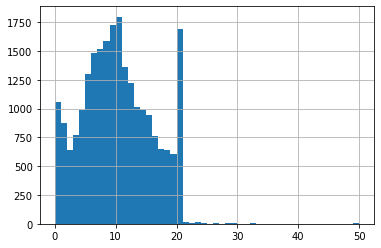

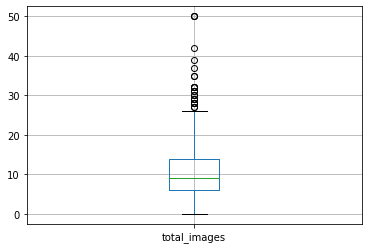

In [7]:
column_details(data, 'total_images', 50)

Пропусков нет.  
Гистограмма выглядит так, как будто единичные значения больше 20 - это выбросы, слишком реский скачок от нескольких сотен объявлений в районе 20 практически до нуля. Диаграмма размаха подтверждает это предположение, нормальные значения заканчиваются где-то после значений 25-26. Вряд ли количество фотографий может сильно отражаться на цене, так что пока можно оставить это так, но мы на всякий случай запомним эту особенность. 
Довольно странно, что на гистограмме есть пик около нуля и пик около 20, хотя в остальном распределение на вид довольно похоже на нормальное.

Зато функция работает, как надо.

### Стоимость квартир  

Посмотрим, что со следующим столбцом, цены на квартиры, столбец `last_price`.  
Мы уже значем, что возможно с данными в нём есть проблемы: слишком большой разброс.

column = last_price

Тип данных: float64
Пропущенных значений: 0.00%
Уникальных значений: 2978

Описательная статистика

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64



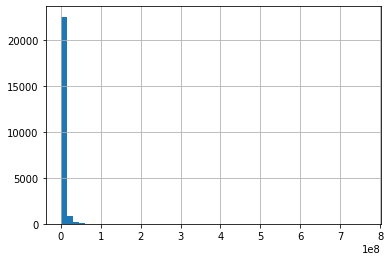

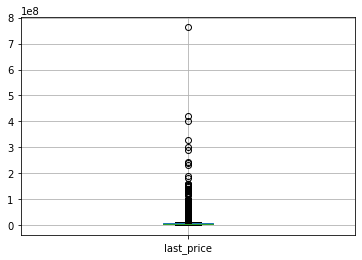

In [8]:
column_details(data, 'last_price', 50)

Пропусков нет, с типом данных всё в порядке.  
А графики выглядят не очень красиво, в них много значений, отличающихся от нормальных.  
Стандартное отклонение просто огромное (10 миллионов!), медиана сильно отличается от среднего (медиана равна 4,65 млн, а среднее 6,54 млн).  
Максимальная стоимость - 763 миллиона. Теоретически чья-то очень крутая квартира столько может стоить, но к ней стоит приглядеться повнимательнее.  
При этом основная масса квартир (в границах "ящика") стоят от 3 до 7 миллионов. Но, судя по диаграмме размаха, выбросов очень много.

Попробуем посмотреть на те же графики, ограничив масштаб 15 миллионами.

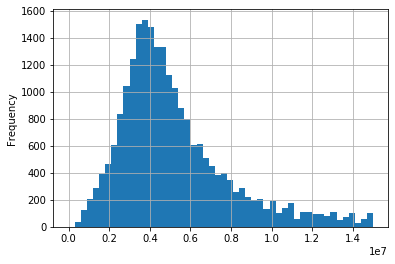

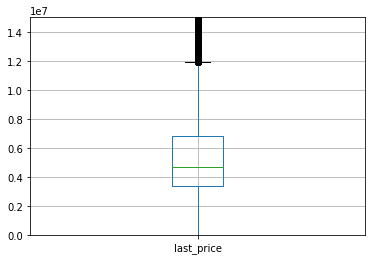

In [9]:
data['last_price'].plot(kind='hist', bins=50, range=(0, 15000000), grid=True)
plt.show()
data.boxplot(column='last_price')
plt.ylim(0, 15000000)
plt.show()

Если сравнивать наше распределение цен с нормальным, то нормальные цены должны заканчиваться около 12 миллионов. Но квартиры бывают разные (например, в центре Питера, трёхэтажные и шестисотметровые), и некоторые должны стоить больше. 

Посмотрим на самые дорогие квартиры:

In [10]:
display(data.sort_values(by='last_price', ascending=False).head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0


Так и есть, квартира в центре Питера, на последнем этаже (мансарда, наверное), с высокими потолками, 12 комнатами, стометровой кухней и тремя баконами точно должна стоить дорого. Хотя квартира за 763 миллиона всё равно выдеяется из всех.  


В целом с данными вроде бы всё в порядке. Несколько неудобно ориентироваться в суммах, когда в них такое количество нулей. Если минимальные значения не слишком отличаются, то удобнее было бы перевести значения в миллионы. 
Посмотрим ещё раз на минимальные цены на квартиры:

In [11]:
display(data['last_price'].sort_values().head())

8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
17676    450000.0
Name: last_price, dtype: float64

Квартира за 12 тысяч - это странно. Посмотрим на неё отдельно.

In [12]:
display(data[data['last_price'] == 12190.0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Квартира в Питере, площадь 109 метров, а цена 12 тысяч - это явно какая-то ошибка. Даже самая плохая квартира не может стоить меньше, чем оформление сделки по её покупке. Посмотрим, сколько стоят аналогичные квартиры.  
Условия для среза: 
- цена больше 15 тысяч (без учёта этой подозрительной строки);
- общая площадь от 90 до 100 квадратных метров;
- город Санкт-Петербург;
- расстрояние от центра от 8 до 10 километров.

In [13]:
print('min price =',
      data.query(
    'last_price > 15000 and 90 < total_area < 110 and rooms == 2 and locality_name == "Санкт-Петербург" and 8000 < cityCenters_nearest < 10000'
)['last_price'].min())

print('median price =',
    data.query(
    'last_price > 15000 and 90 < total_area < 110 and rooms == 2 and locality_name == "Санкт-Петербург" and 8000 < cityCenters_nearest < 10000'
)['last_price'].median())

print('max price =',
    data.query(
    'last_price > 15000 and 90 < total_area < 110 and rooms == 2 and locality_name == "Санкт-Петербург" and 8000 < cityCenters_nearest < 10000'
)['last_price'].max())

min price = 6890000.0
median price = 15300000.0
max price = 21615000.0


In [ ]:
data.loc[
    (data["last_price"] > 15000) &
    (data["total_area"] < 90)
]

Аналогичные квартиры стоят от 7 до  21 миллионов. Скорее всего, в строке ошибка: жильё может стоить слишком дорого, но вот слишком дёшево - вряд ли.  
Возможно, значение было не в единицах, а в тысячах, тогда оно не выбивается из общего ряда. Исправляем и делаем проверку:

In [14]:
data['last_price'].where(data['last_price'] > 15000, 12190000, inplace=True)

# data.loc[data['last_price'] == 12190.0, 'last_price'] = 12190000.0

print('data min price =', data['last_price'].min())
print('data median price =', data['last_price'].median())
print('data max price =', data['last_price'].max())

data min price = 430000.0
data median price = 4650000.0
data max price = 763000000.0


Теперь можно перевести цены в миллионы, чтобы было легче в них ориентироваться.

In [15]:
data['last_price_mln'] = data['last_price'] / 1000000
print('Разброс цен на квартиры - от {} до {} миллионов'.format(data['last_price_mln'].min(), data['last_price_mln'].max()))

Разброс цен на квартиры - от 0.43 до 763.0 миллионов


Так воспринимать числа легче. Удаляем столбец `last_price` и делаем проверку.

In [16]:
def

Index(['total_images', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'last_price_mln'],
      dtype='object')

Данные о стоимости квартир готовы. 

### Дата публикации

В столбце `first_day_exposition` нужно исправить тип данных на `datetime64`. Изменяем тип данных и применяем функцию  `column_details` для проверки.

column = first_day_exposition

Тип данных: datetime64[ns]
Пропущенных значений: 0.00%
Уникальных значений: 1491

Первая запись: 2014-11-27 00:00:00
Последняя запись: 2019-05-03 00:00:00


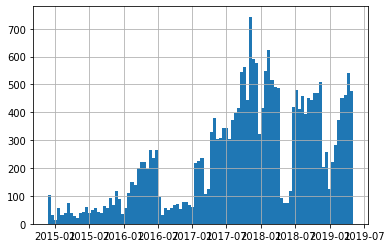

In [17]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], 
    format='%Y-%m-%dT%H:%M:%S'
)

column_details(data, 'first_day_exposition', 100)

Количество объявлений со временем растёт, но есть периоды, когда их меньше.  
Время публикации не записывалось, так что округляем значения до даты, чтобы проще было их воспринимать.

In [18]:
data['first_day_exposition'] = data['first_day_exposition'].dt.round('d')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


Теперь со столбцом `first_day_exposition` всё в порядке.

### Количество комнат

Следующий столбец - количество комнат, `rooms`. Нужно проверить, почему в некоторых строках стоит 0 комнат.  
Для начала посмотрим на данные в столбце (применяем `column_details`).

column = rooms

Тип данных: int64
Пропущенных значений: 0.00%
Уникальных значений: 17

Описательная статистика

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64



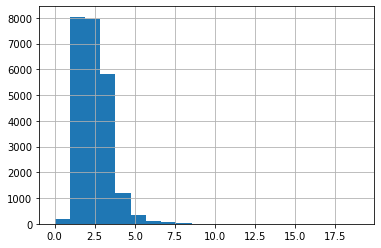

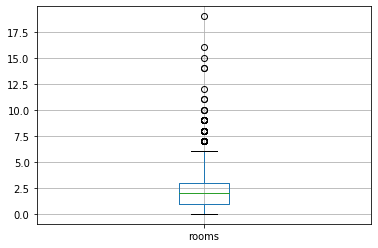

In [19]:
column_details(data, 'rooms', 20)

Большинство живёт в квартирах от 1 до 3 комнат. И подавляющее большинство живёт в квартирах с менее, чем 7 комнат. Дальше - это уже знакомые нам очень дорогие квартиры с 10 комнатами и больше. 

Теперь разберёмся со слишком маленькими значениями.  
Значение 0 комнат, похоже, встречается довольно часто (оно входит в границы нижнего "уса" диаграммы размаха). Это студии или это ошибка?  
Посмотрим на квартиры с нулём комнат. Посчитаем их количество, минимальную и максимальную площадь. Выведем несколько строк (только те столбцы таблицы, которые помогут нам понять планировку квартиры).

In [20]:
print('total rooms=0: {} \nmin total area = {} \nmedian total area = {} \nmax total area = {}'.format(
    data[data['rooms'] == 0]['rooms'].count(),
    data[data['rooms'] == 0]['total_area'].min(),
    data[data['rooms'] == 0]['total_area'].median(),
    data[data['rooms'] == 0]['total_area'].max()
))

display(
    data.loc[data['rooms'] == 0, 
    ['total_area', 'living_area', 'studio', 'open_plan', 'kitchen_area', 'balcony']].head())



total rooms=0: 197 
min total area = 15.5 
median total area = 26.05 
max total area = 371.0


,total_area,living_area,studio,open_plan,kitchen_area,balcony
144,27.00,15.50,True,False,NaN,2.0
349,25.00,17.00,False,True,NaN,0.0
440,27.11,24.75,True,False,NaN,2.0
508,34.40,24.30,False,True,NaN,1.0
608,25.00,NaN,True,False,NaN,NaN


Площадь небольшая, цена тоже. Данных о кухне нет.  
Некоторые квартиры отмечены пользователем как студии, а некоторые - как квартиры со свободной планировкой. Скорее всего, здесь в данных всё правильно: площадь 15,5 метров больше похожа на студию, а 371 - явно квартира со свободной планировкой. Проверим, есть ли квартиры с нулём комнат, которые и не студии, и не со свободной планировкой

In [21]:
data_0_rooms_pivot = data.query('rooms == 0').pivot_table(
    index=['studio', 'open_plan'],
    values=['total_area'],
    aggfunc='count'
)

display(data_0_rooms_pivot)

,,total_area
studio,open_plan,
False,True,59
True,False,138


Квартиры с нулём комнат - либо студии, либо квартиры о свободной планировкой, других нет. Значит, всё правильно.

### Высота потолков

В этом столбце есть пропуски и точно есть ошибки: не бывает квартир с высотой потолков метр или сто метров.  
Изучим данные в столбце при помощи функции `column_details`:

column = ceiling_height

Тип данных: float64
Пропущенных значений: 38.80%
Уникальных значений: 184

Описательная статистика

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64



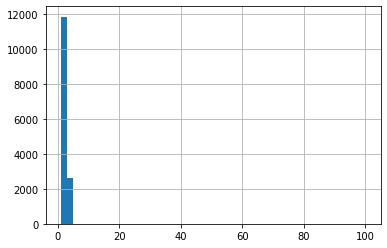

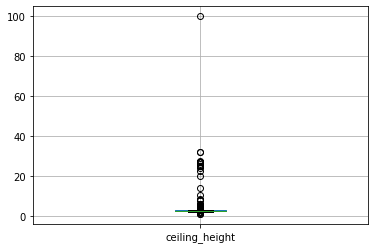

In [22]:
column_details(data, 'ceiling_height', 50)

Максимум - сто метров и много точек в районе 20-30 метров, неправдоподобные значения.    
Посмотрим на строки, в которых высота потолка больше 5 метров и посчитаем их количество:

In [23]:
count = len(data[data['ceiling_height'] > 5])
print('total [ceiling_height > 5] =', count)

print('unique =', data[data['ceiling_height'] > 5]['ceiling_height'].unique())

total [ceiling_height > 5] = 36
unique = [ 25.    5.2   5.3   5.6  32.    8.   27.   24.   26.    8.3   5.5  14.
  20.    6.   22.6   5.8  27.5  10.3 100. ]


Похоже, в некоторых строках просто не там стоит запятая (27 метров вместо 2,7).  
А 100 метров, 8, 8,3, 10 и 14 - явно ошибка.  
Потолки от 5 до 6 метров - это много, но в мансарде, например, такие могут и быть. В данных их довольно много, будем считать их нормальными.     
Высоту потолков в диапазоне от 20 до 40 заменим на значение в 10 раз меньше и сделаем проверку.

In [24]:
data['ceiling_height'].where(
    ((data['ceiling_height'] < 19) | (data['ceiling_height'] > 40))
    , data['ceiling_height'] / 10,
    inplace=True
)

count = len(data[data['ceiling_height'] > 6])
print('total [ceiling_height > 6] =', count)

print('unique =', data[data['ceiling_height'] > 6]['ceiling_height'].unique())

total [ceiling_height > 6] = 7
unique = [  8.    8.3  14.   10.3 100. ]


Осталось 7 строк со слишком высокими потолками: 8, 8,3, 10.3, 14 и 100 метров. Чем они могли бы быть на самом деле, непонятно, поэтому заменим их на NA. Делаем замену и проверку:

In [25]:
data['ceiling_height'].where(
    (data['ceiling_height'] != 8)
    & (data['ceiling_height'] != 8.3)
    & (data['ceiling_height'] != 10.3) 
    & (data['ceiling_height'] != 14)
    & (data['ceiling_height'] != 100)
    , np.nan,
    inplace=True
)

count = len(data[data['ceiling_height'] > 10])
print('total [ceiling_height > 10] =', count)
print('unique =', data[data['ceiling_height'] > 10]['ceiling_height'].unique())

total [ceiling_height > 10] = 0
unique = []


Со слишком большими значениями разобрались, теперь посмотрим, что со слишком маленькими.
Распечатываем минимальные значения и количество строк с потолком меньше 24м:

In [26]:
count = len(data[data['ceiling_height'] < 2.4])
print('total [ceiling_height < 2.4] =', count)
print('unique =', data[data['ceiling_height'] < 2.4]['ceiling_height'].unique())

total [ceiling_height < 2.4] = 23
unique = [2.34 2.   2.3  1.2  2.2  1.75 2.25 2.26 1.  ]


В двух строках высота потолка совсем неправдоподобная: 1м и 1,2м, и в одной - очень сомнительная, 1,75м (человек среднего роста будет упираться головой в потолок).  
Высота 2м тоже вызывает сомнения. В советское время самые низкие потолки были в хрущёвках, это 2,4м. Но мы имеем дело с Санкт-Петербургом и Ленинградской областью, там могут быть и дореволюционные дома, в том числе с достроенным вторым этажом, или деревенские дома. В таких домах высота потолков вполне может быть нестандартной. Будем считать нормальной высоту потолков от 2м.  
Заменим неправдоподобные значения (меньше 2м) на NA:

In [27]:
data['ceiling_height'].where(
    (data['ceiling_height'] != 1.2) 
    & (data['ceiling_height'] != 1.75)
    & (data['ceiling_height'] != 1)
    , np.nan,
    inplace=True
)

count = len(data[data['ceiling_height'] < 2])
print('total [ceiling_height < 2] =', count)
print('unique =', data[data['ceiling_height'] < 2]['ceiling_height'].unique())

total [ceiling_height < 2] = 0
unique = []


**Пропуски**  
Пропущенных значений очень много, около 40%. ВОзможно, пропуски возникают из-за того, что пользователи не знают высоту потолков в квартирах, это не самая очевидная вещь, а в документах она указывается не так часто.  

Попробуем восстановить высоту потолков по группам. Скорее всего, высота потолков одинаковая в домах одного типа.  
Логично было бы сгруппировать данные по характеристикам `floors_total` и `locality_name`, но эти столбцы мы ещё не проверяли на наличие ошибок. Вернёмся к пропускам в столбце `ceiling_height` после того, как сделаем предобработку данных в нужных столбцах.

### Количество этажей
В этом столбце были пропуски и подозрительное значение 60 этажей.
Посмотрим на характиристики данных в столбце и графики:

column = floors_total

Тип данных: float64
Пропущенных значений: 0.36%
Уникальных значений: 37

Описательная статистика

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64



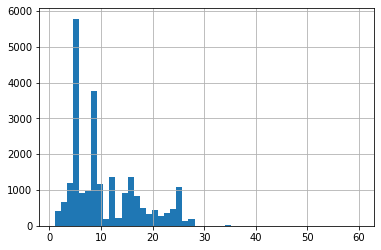

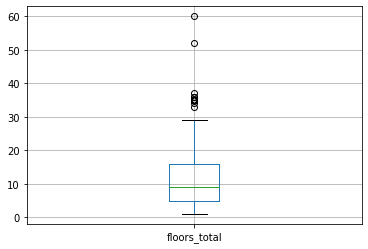

In [28]:
column_details(data, 'floors_total', 50)

Пропусков немного, меньше процента. Это значит, их одинаково эффективно можно как заполнить, так и оставить пропусками, они не повлияют на распределение данных. 
Правдоподобными выглядят строки с количеством этажей меньше 40. Диаграмма размаха показывает выбросы в районе 33-37 этажей, но мы знаем что такие строят, а распределение по количеству этажей и не должно быть нормальным.  
Посмотрим на строки с количеством этажей больше 40.

In [29]:
count = len(data[data['floors_total'] > 40])
print('total [floors_total > 40] =', count)
print('unique =', data[data['floors_total'] > 40]['floors_total'].unique())

display(data[data['floors_total'] > 40])

total [floors_total > 40] = 2
unique = [60. 52.]


,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln
2253,12,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,False,...,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,3.800
16731,9,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,False,...,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,3.978


Поверхностный поиск в интенете даёт результат: самый высокый жилой дом в Санкт-Петербурге - ЖК "Князь Александр Невский" с 37 этажами. Значения больше 37 этажей будем считать выбросами.  
А уж в Кронштадте 60-этажных жилых домов точно нет.

Таких строк всего две, поэтому мы можем удалить их без ущерба для качества датасета. Удаляем и делаем проверку:

In [30]:
# data = data.drop(data.loc[data['floors_total'] > 40].index)
data = data[(data['floors_total'] < 40) | (data['floors_total'].isna())]

count = len(data[data['floors_total'] > 40])
print('total [floors_total > 40] =', count)
print('unique =', data[data['floors_total'] > 40]['floors_total'].unique())

total [floors_total > 40] = 0
unique = []


**Пропуски**  
В столбце `floors_total` пропусков немного (меньше процента), но в целом в датасете очень много пропусков, поэтому лучше по возможности не удалять строки. Посмотрим, сможем ли мы заменить пропуски, не сильно повлияв при этом на распределение.  
Рассчитаем медианное значение этажности дома для каждого значения столбца `floor` и заменим пропущенные значения отдельно для каждой группы.

In [31]:
data['floors_total_new'] = data['floors_total']

for name, data_grouped in data.groupby('floor'):
    median_floor = data_grouped['floor'].median()
    data['floors_total_new'] = data['floors_total'].fillna(median_floor)
    
print('Пропусков в столбце floors_total:', data['floors_total'].isnull().sum())
print('Пропусков в столбце floors_total_new:', data['floors_total_new'].isnull().sum())

Пропусков в столбце floors_total: 86
Пропусков в столбце floors_total_new: 0


Сравним получившееся распределение с те, что было до заполнения пропусков:

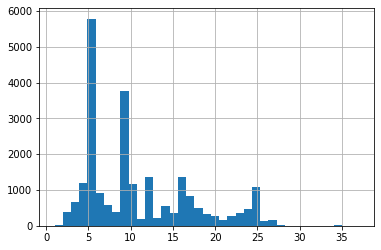

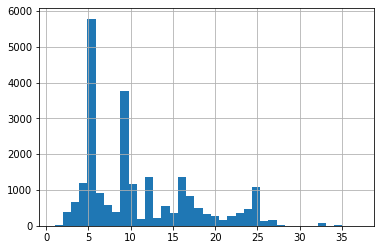

In [32]:
data['floors_total'].hist(bins=37)
plt.show()
data['floors_total_new'].hist(bins=37)
plt.show()

In [33]:
data['floors_total'].describe()

count    23611.000000
mean        10.669984
std          6.584146
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

In [34]:
data['floors_total_new'].describe()

count    23697.000000
mean        10.751023
std          6.707962
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total_new, dtype: float64

Форма частотной гистограммы и основные показатели практически не изменились. Будем считать заполнение пропусков успешным.

**Тип данных**  
Сейчас в столбце тип данных float, но количество этажей (даже после замены на медиану) не может быть дробным.  
Исправляем тип данных на int и копируем данные в столбец `floors_total`. После проверки удаляем вспомогательный столбец `floors_total_new`.

In [35]:
data['floors_total'] = data['floors_total_new'].astype('int')
data['floors_total'].dtype

dtype('int64')

In [36]:
data = data.drop('floors_total_new', axis=1)
data.columns

Index(['total_images', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'last_price_mln'],
      dtype='object')

Данные о количестве этажей в порядке. Удалены подозрительно большие значения, заполнены пропуски, тип данных изменён на целочисленный.

### Жилая площадь
В столбце `living_area` нужно изучить пропуски и выбрать способ работы с ними.  
Для начала посмотрим на данные в столбце:

column = living_area

Тип данных: float64
Пропущенных значений: 8.03%
Уникальных значений: 1783

Описательная статистика

count    21794.000000
mean        34.459276
std         22.030806
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64



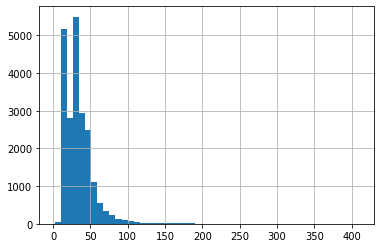

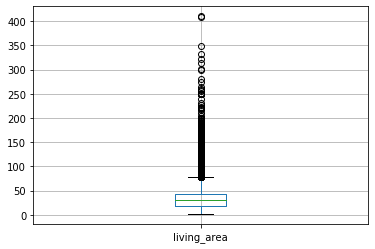

In [37]:
column_details(data, 'living_area', 50)

Пропусков гораздо больше, чем в предыдущем столбце, около 8%.  
Распределение гораздо больше похоже на пусаcсоновское, чем на нормальное. Но мы уже видели это в ценах на квартиры, квартиры разные (и по ценам и по площади), и такое распределение вполне адевкатно. 


Сначала разберёмся со странными значениями: слишком маленькая жилая площадь. На двух квадратных метрах может разместиться только одна односпальная кровать, да и то не всякая. Это определённо ошибка.  

Выведем строки, отсортированные по возрастанию жилой площади. Возьмём только те столбцы, которые помогут нам понять планировку квартиры.

In [38]:
display(data.loc[
    :, 
    ['total_area', 'living_area', 'studio', 'open_plan', 'kitchen_area', 'balcony']].
        sort_values(by='living_area').head(10))

,total_area,living_area,studio,open_plan,kitchen_area,balcony
21758,23.0,2.0,True,False,NaN,NaN
13915,52.0,2.0,False,False,9.0,NaN
3242,41.0,3.0,False,False,11.0,NaN
23574,139.0,3.0,False,False,16.0,1.0
17582,22.0,5.0,True,False,NaN,2.0
21943,77.6,5.4,False,False,9.8,NaN
16431,31.0,6.0,False,False,17.0,NaN
19251,33.0,6.5,False,False,18.0,NaN
20994,50.6,8.0,False,False,31.0,NaN
23208,37.0,8.0,False,False,22.0,0.0


Строк со слишком маленькой жилой площадью не очень много. Некоторые квартиры - студии, это объясняет такую маленькую площадь. А некоторые - вполне обычные квартиры с большими кухнями.

Современные нормы запрещают делать жилые комнаты площадью меньше 9 квадратных метров. Возмём это за отправную точку. Заменим значения жилой площади, меньше 9 метров на NA. 

In [39]:
data['living_area'].where(
    data['living_area'] >= 9, 
    np.nan, 
    inplace=True)

print('min living_area =', data['living_area'].min())

min living_area = 9.0


**Пропуски**  
8% пропусков - это довольно много, а данных, по которым можно было бы их восстановить, мало. Заполнение пропусков на основе расчётов приводит к изменению характера распределения и может исказить результаты. В данном случае лучше оставить пропуски как есть.

### Аппартаменты
В столбце `is_apartment` самое большое количество пропусков, но другие столбцы никак не указывают на то, что могло бы за ними скрываться. Придётся оставить, как есть.  
При переводе в тип данных `bool` пропуски распознаются как значение `True`, поэтому оставляем тип данных `object`.

### Студии и квартиры со свободной планировкой
Очень странно, что в аналогичном столбце (который python распознал как `object`) пропусков почти 90%, а в `studio` и в `open_plan` их нет совсем. Скорее всего, они были, но при распознавании csv файла (или при выгрузке с сайта) записались как значения одной из категорий. Было бы странно, если бы пользователи в одной графе ставили галочку настолько прилежнее, чем в другой, похожей.

Посмотрим, какой процент квартир по нашим данным студии, а какой - квартиры со свободной планировкой.

In [40]:

print('Studio: {:.2%}'.format(data['studio'].mean()))
print('Open_plan: {:.2%}'.format(data['open_plan'].mean()))

Studio: 0.63%
Open_plan: 0.28%


И то и другое - меньше процента. Студии, конечно, не так распространены, как двухкомнатные квартиры: в советских и, тем более, дореволюционных домах они вряд ли встречаются, но в новостройках должны всречаться гораздо чаще.

Но у нас пока не хватает данных, для того, чтобы предположить, где могут быть потерянные пропуски, и как их заполнить. 

### Площадь кухни
Нужно разобраться с пропусками и со странным значением 1,3 метра. Посмотрим на данные столбца:

column = kitchen_area

Тип данных: float64
Пропущенных значений: 9.61%
Уникальных значений: 972

Описательная статистика

count    21419.000000
mean        10.569795
std          5.905627
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64



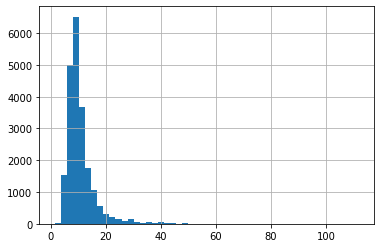

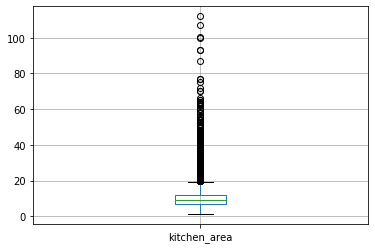

In [41]:
column_details(data, 'kitchen_area', 50)

Пропущенных значений чуть больше, чем для жилой площади, графики привычной формы. Стандартное отклонение довольно большое, что не удивительно при такой форме распределения.  
Слишком маленьких значений, если судить по графикам, не очень много, но всё-таки есть. Посмотрим на строки с наименьшими значениями площади кухни. При этом выведем только те столбцы, которые касаются планировки квартиры.

а то что слева ворнинг новый, 

In [42]:
display(data.loc[
    :, 
    ['total_area', 'living_area', 'rooms', 'studio', 'open_plan', 'kitchen_area', 'balcony']].
        sort_values(by='kitchen_area').head())

,total_area,living_area,rooms,studio,open_plan,kitchen_area,balcony
20217,28.5,19.5,1,False,False,1.3,NaN
21419,20.0,14.0,1,False,False,2.0,NaN
16367,25.7,22.6,1,False,False,2.0,NaN
906,27.0,18.0,1,False,False,2.0,0.0
11033,32.0,16.0,1,False,False,2.0,0.0


Таких строк довольно много, хотя представить себе кухню площадью 2 квадратных метра очень сложно. Чтобы определить, где начинаются более частотные значения, посмотрим на гистограмму, ограничив её диапазоном от 0 до 12:

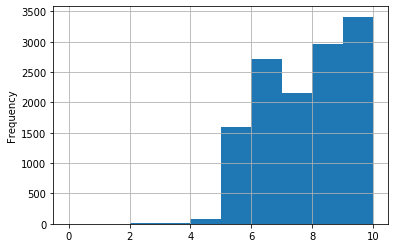

In [43]:
data['kitchen_area'].plot(kind='hist', range=(0, 10), grid=True)

Значения меньше пяти выглядят как выбросы. Удаляем их и делаем проверку:

In [44]:
data = data[(data['kitchen_area'] >= 5) | (data['kitchen_area'].isna())]
print(data['kitchen_area'].min())

5.0


Попробуем вычислить пропущенные значения площади. Рассчитаем, какую долю нежилого помещения обычно занимает кухня:

In [45]:
(data['kitchen_area'] / (data['total_area'] - data['living_area'])).describe()

count    20864.000000
mean         0.428974
std          0.201949
min          0.040967
25%          0.352941
50%          0.411765
75%          0.478261
max         11.365854
dtype: float64

В среднем от 35% до 47%. Это довольно небольшой разброс. Заменим пропущенные значения кухни на 41% (медиана) нежилой площади для квартир, которые не отмечены, как студии. Если вычисленное значение будет меньше 5, оставим в ячейке NaN.  
Длая заполнения пропусков напишем функцию `calculate_kitchen`.

In [46]:
def calculate_kitchen(row):
    kitchen = (row['total_area'] - row['living_area']) * 0.41
    if (pd.isna(row['kitchen_area'])) & (row['studio'] == False) & (kitchen >= 5):
#         print(row['kitchen_area'], kitchen, pd.isna(row['kitchen_area']), (row['studio'] == False))
        return kitchen
    

Пропусков до применения функции: 2278


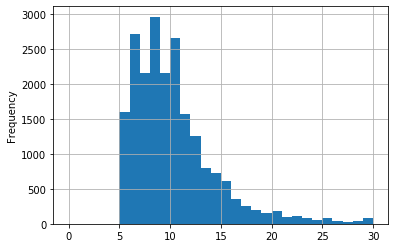

In [47]:
print('Пропусков до применения функции:', data['kitchen_area'].isna().sum())
data['kitchen_area'].plot(kind='hist', bins=30, range=(0, 30), grid=True)

Пропусков после применения функции: 1833


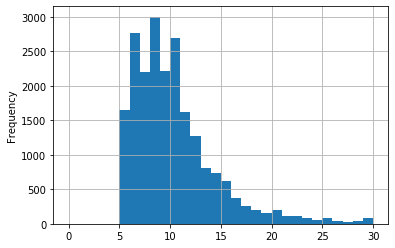

In [48]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.apply(calculate_kitchen, axis=1))

print('Пропусков после применения функции:', data['kitchen_area'].isna().sum())
data['kitchen_area'].plot(kind='hist', bins=30, range=(0, 30), grid=True)

Форма распределения практически не изменилась, а количество пропусков сократилось.

### Другие подсобные помещения
Посчитаем, какую площадь обычно занимают остальные подсобные помещения в квартирах из нашей выборки. Если Добавим столбец `other_utility_area`, который будет вычисляться как разность общей площади, жилой площади и кухни:

In [49]:
data['other_utility_area'] = (data['total_area'] - data['living_area'] - data['kitchen_area'])

# data['other_utility_area'].describe()


Медианное значение 12,7 квадратных метров, а вот минимум имеет отрицательное значение. Так быть не может. Площадь других подсобных помещений не может так же равняться нулю: как минимум, в квартире должен быть санузел. Или, если это деревенски дом, то должны быть прихожая или сени.   
Отсортируем таблицу по столбцу `other_utility_area` и посмотрим на первые пять строк: 

In [50]:
display(data.loc[
    :, 
    ['other_utility_area', 'total_area', 'living_area', 'rooms', 'studio', 'open_plan', 'kitchen_area', 'balcony']].
        sort_values(by='other_utility_area', ascending=True).head())


,other_utility_area,total_area,living_area,rooms,studio,open_plan,kitchen_area,balcony
7239,-29.80,90.00,76.4,3,False,False,43.4,3.0
4366,-20.30,47.70,39.8,2,False,False,28.2,1.0
6802,-20.00,69.00,64.0,2,False,False,25.0,NaN
11579,-19.00,33.00,26.0,1,False,False,26.0,0.0
12530,-16.47,39.03,36.9,1,False,False,18.6,2.0


Случай, когда общая площадь меньше суммы жилой площади и кухни, не единственный. Посмотрим, сколько всего строк, в которых столбец `other_utility_area` принимает отрицательные значения.

In [51]:
print('other_utility_area > 0: {:.2%}'.format(
    data[data['other_utility_area'] > 0]['other_utility_area'].count() / len(data)
))
      
print('other_utility_area <= 0: {:.2%}'.format(
    data[data['other_utility_area'] <= 0]['other_utility_area'].count() / len(data)
))
      
print('other_utility_area = NA: {:.2%}'.format(
    data['other_utility_area'].isna().sum() / len(data)))


other_utility_area > 0: 89.78%
other_utility_area <= 0: 0.54%
other_utility_area = NA: 9.68%


Странных строк немного, поэтому их можно удалить без особого ущерба для результатов (восстановить их не получится, так как не понятно, в какой именно строке ошибка).



In [52]:
data = data[(data['other_utility_area'] > 0) | data['other_utility_area'].isna()]
# data = data.drop(data.loc[data['other_utility_area'] <= 0].index)

print('other_utility_area > 0: {:.2%}'.format(
    data[data['other_utility_area'] > 0]['other_utility_area'].count() / len(data)
))
      
print('other_utility_area <= 0: {:.2%}'.format(
    data[data['other_utility_area'] <= 0]['other_utility_area'].count() / len(data)
))
      
print('other_utility_area = NA: {:.2%}'.format(
    data['other_utility_area'].isna().sum() / len(data)))



other_utility_area > 0: 90.27%
other_utility_area <= 0: 0.00%
other_utility_area = NA: 9.73%


Посмотрим на частотную гистограмму, чтобы определить границу странных значений.

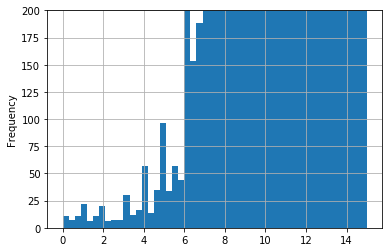

In [53]:
data['other_utility_area'].plot(kind='hist', bins=50, range=(0,15), ylim=(0, 200), grid=True)

Есть пик в районе нуля, почему-то колебания в районе целых значений (1, 2, 4, 5). Резкий взлёт графика начинается в районе 6, а плавный подъём  - в районе 4-5. Мы знаем, что квартиры в нашей выборке очень разные, так что примем за нормальное значение точку начала роста, 4 квадратных метра.  
Считаем количество строк, в которых вычисленныя площадь других подсобных помещений кроме кухни меньше 4:

In [54]:
print('other_utility_area > 0: {}'.format(
    data[data['other_utility_area'] < 4]['other_utility_area'].count()
))

print('other_utility_area > 0: {:.2%}'.format(
    data[data['other_utility_area'] < 4]['other_utility_area'].count() / len(data)
))


other_utility_area > 0: 167
other_utility_area > 0: 0.71%


Меньше процента. Удаляем строки со странными значениями и делаем проверку.

In [55]:
data = data[(data['other_utility_area'] >= 4) | (data['other_utility_area'].isna())]
print(data['other_utility_area'].min())

4.0


Странные объявления в нашей выборке могли остаться, но часть мы точно выявили.

### Балконы

column = balcony

Тип данных: float64
Пропущенных значений: 48.58%
Уникальных значений: 7

Описательная статистика

count    11980.000000
mean         1.146912
std          1.070104
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64



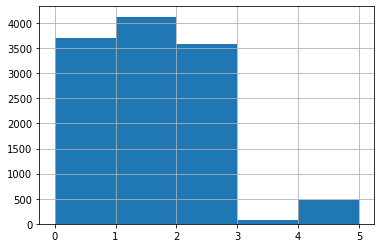

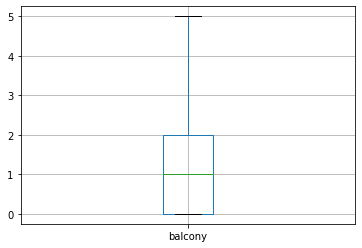

In [56]:
column_details(data, 'balcony', 5)

Пропущенных значений много, почти 50%. В данном случае, скорее всего, пропуск означает отсутствие балконов. Заменим пропуски на 0.

In [57]:
data['balcony'] = data['balcony'].fillna(0)
print('balcony is na =', data['balcony'].isna().sum())

balcony is na = 0


Пропуски заполнены.

### Населённый пункт

В столбце `locality_name` есть пропуски и нужно проверить названия на наличие дублей и ошибок в написании. Посмотрим на результаты применения функции `column_details`:

In [58]:
column_details(data, 'locality_name', 50)

column = locality_name

Тип данных: object
Пропущенных значений: 0.21%
Уникальных значений: 363

Уникальные значения:
Санкт-Петербург         15492
посёлок Мурино            513
посёлок Шушары            436
Всеволожск                389
Пушкин                    365
                        ...  
деревня Вахнова Кара        1
деревня Чудской Бор         1
деревня Кисельня            1
деревня Русско              1
посёлок Левашово            1
Name: locality_name, Length: 362, dtype: int64


Пропусков немного, но восстановить их вряд ли получится.  
Уникальных значений 365, довольно много. Встречаются не только города, но и деревни, и посёлки. Причем посёлки иногда записаны через "ё", а иногда - через "е".  
Для начала заменим везде "ё" на "е" и заглавные буквы на строчные.

In [59]:
print(data['locality_name'].unique()[0:5])
print()

data['locality_name'] = data['locality_name'].str.replace('ё', 'е').str.lower()


print('Уникальных значений:', len(data['locality_name'].unique()))
print()
print(data['locality_name'].unique()[0:5])

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино']

Уникальных значений: 329

['санкт-петербург' 'поселок шушары' 'городской поселок янино-1'
 'поселок парголово' 'поселок мурино']


Пропуски заменим на "неизвестно".

In [60]:
data['locality_name'] = data['locality_name'].fillna('неизвестно')
print('Количество пропусков:', data['locality_name'].isna().sum())
print('Количество дубликатов:', data.duplicated().sum())

Количество пропусков: 0
Количество дубликатов: 0


Было бы удобно выделить в отдельные столбцы тип населённого пункта и его название. Для этого делаем лемматизацию:

In [61]:
from pymystem3 import Mystem
m = Mystem()

In [62]:
def lemmas(str):
    lemmas = m.lemmatize(str)
    return lemmas

In [63]:
data['lemmas'] = data['locality_name'].apply(lemmas)
print(data['lemmas'].head())

0       [санкт-петербург, \n]
1    [поселок,  , шушары, \n]
2       [санкт-петербург, \n]
3       [санкт-петербург, \n]
4       [санкт-петербург, \n]
Name: lemmas, dtype: object


Напишем функцию, которая выделит из лемматизированного списка тип населённого пункта, сравнив его со списком ключевых слов.

In [64]:
def locality_type(lemmas):
    """функция принимает на входе текстовую строку, 
    проверяет, есть ли в ней какое-то из ключевых слов: 
    [недвижимость, квартира, жилье, автомобиль, образование, свадьба, ремонт]
    и возвращает категорию, к которой относится это ключевое слово."""

    if 'городской' in lemmas:
        return 'поселок городского типа'
    if 'деревня' in lemmas:
        return 'деревня'
    if 'село'  in lemmas:
        return 'село'
    if 'коттеджный' in lemmas:
        return 'коттеджный посёлок'
    if ('садовый' in lemmas or 'садоводческий' in lemmas) and 'товарищество' in lemmas :
        return 'садовое товарищество'
    if 'неизвестно' in lemmas:
        return 'неизвестно'
    elif 'поселок' in lemmas:
        return 'поселок' 
    else:
        return 'город'

In [65]:
data['locality_type'] = data['lemmas'].apply(locality_type)


In [66]:
for name, data_grouped in data.groupby('locality_type'):
    print(name, data_grouped['locality_name'].unique())
    print()

город ['санкт-петербург' 'ломоносов' 'сертолово' 'петергоф' 'пушкин' 'коммунар'
 'колпино' 'гатчина' 'выборг' 'кронштадт' 'кировск' 'павловск'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'сясьстрой'
 'сланцы' 'ивангород' 'мурино' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'кудрово' 'луга' 'волосово' 'отрадное' 'тихвин' 'тосно'
 'бокситогорск' 'пикалево' 'кириши' 'подпорожье' 'приморск' 'новая ладога'
 'лодейное поле' 'светогорск' 'каменногорск' 'любань' 'высоцк']

деревня ['деревня кудрово' 'деревня федоровское' 'деревня новое девяткино'
 'деревня пикколово' 'деревня куттузи' 'деревня заклинье' 'деревня старая'
 'деревня лесколово' 'деревня оржицы' 'деревня кальтино' 'деревня нурма'
 'деревня лопухинка' 'деревня кипень' 'деревня келози' 'деревня вартемяги'
 'деревня агалатово' 'деревня лаголово' 'деревня белогорка'
 'деревня большие колпаны' 'деревня горбунки' 'деревня батово'
 'деревня заневка' 'деревня иссад' 'деревня мистолово'
 'деревня разметелево' '

Посёлок городского типа и городской посёлок объединились в одну категорию, это правильно, так как это одно и то же. Ещё есть "посёлок при железнодорожной станции", будем считать, что это просто посёлок.

Удаляем столбец `lemmas`, он больше не нужен, и делаем проверку данных на дубликаты.

In [67]:
data = data.drop('lemmas', axis=1)
print(data.duplicated().sum())

0


Теперь нужно выделить отдельно название населённого пункта. Для этого создаём список лемм, которые описывают тип населённого пункта, и пише м функцию `drop_locality_types`, которая удаляет из строки слова, которые есть в этом списке.

In [68]:
locality_types = ['деревня ', 'поселок ', 'городского ', 'типа ', 'городской ', 'коттеджный ', 'село ', ' село'
                  , 'садовое ', 'некоммерческое ', 'товарищество ', 'при ', 'железнодорожной ', 'станции ']

In [69]:
def drop_locality_types(value, locality_types):
    """функция удаляет из строки `value` слова, если они есть в списке `locality_types`"""
    for str in locality_types:
        if str in value:
            value = value.replace(str, '')
    return value

Проверка работы функции:

In [70]:
drop_locality_types('поселок городского типа расположился при железнодорожной станции "Поповка"', locality_types)

'расположился "Поповка"'

Применяем функцию к столбцу `locality_name` и делаем проверку.

In [71]:
data['locality_name'] = data['locality_name'].apply(drop_locality_types, args=(locality_types,))
for name, data_grouped in data.groupby('locality_type'):
    print(name, data_grouped['locality_name'].unique())
    print()

город ['санкт-петербург' 'ломоносов' 'сертолово' 'петергоф' 'пушкин' 'коммунар'
 'колпино' 'гатчина' 'выборг' 'кронштадт' 'кировск' 'павловск'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'сясьстрой'
 'сланцы' 'ивангород' 'мурино' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'кудрово' 'луга' 'волосово' 'отрадное' 'тихвин' 'тосно'
 'бокситогорск' 'пикалево' 'кириши' 'подпорожье' 'приморск' 'новая ладога'
 'лодейное поле' 'светогорск' 'каменногорск' 'любань' 'высоцк']

деревня ['кудрово' 'федоровское' 'новое девяткино' 'пикколово' 'куттузи'
 'заклинье' 'старая' 'лесколово' 'оржицы' 'кальтино' 'нурма' 'лопухинка'
 'кипень' 'келози' 'вартемяги' 'агалатово' 'лаголово' 'белогорка'
 'большие колпаны' 'горбунки' 'батово' 'заневка' 'иссад' 'мистолово'
 'разметелево' 'пеники' 'пудомяги' 'низино' 'бегуницы' 'колтуши'
 'гостилицы' 'малое карлино' 'аро' 'малое верево' 'извара' 'калитино'
 'чудской бор' 'мины' 'коркино' 'рабитицы' 'кузьмолово' 'малые колпаны'
 'меньково' 

Проверим, есть ли дубликаты:

In [72]:
print(data.duplicated().sum())

0


### Ближайший аэропорт 
В этом столбце нужно разобраться с пропусками. посмотрим на данные:

column = airports_nearest

Тип данных: float64
Пропущенных значений: 23.20%
Уникальных значений: 8207

Описательная статистика

count    17893.000000
mean     28794.685855
std      12613.825576
min          0.000000
25%      18582.000000
50%      26750.000000
75%      37277.000000
max      84869.000000
Name: airports_nearest, dtype: float64



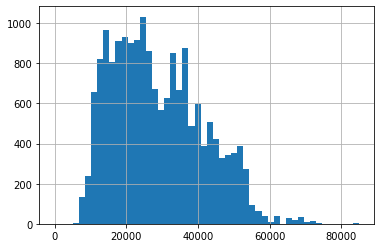

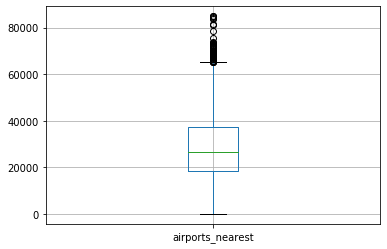

In [73]:
column_details(data, 'airports_nearest', 50)

Минимальное значение 0 нужно заменить на пропуск.  
Пропусков много. Для небольших населённых пунктов (кроме для Санкт-Петербурга) их можно восстановить, если в этом населённом пункте есть другие объявления.  

In [74]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = np.nan
print(data['airports_nearest'].min())

6450.0


Посмотрим на минимальные, медианные, максимальные значения и стандартное отклонение расстояния до ближайшего аэропорта для каждого из населённых пунктов:

In [75]:
display(data.pivot_table(
    index='locality_name',
    values='airports_nearest',
    aggfunc=['median', 'std']).sort_values(by=('std', 'airports_nearest'), ascending=False).head())

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,median,std
,airports_nearest,airports_nearest
санкт-петербург,26788.5,11554.835657
неизвестно,22041.0,8461.691597
петергоф,39242.5,4077.961308
шушары,17429.0,3819.907730
зеленогорск,72280.0,3110.131681


В Санкт-Петербурге слишком большое стандартное отклонение, чтобы можно было достоверно восстановить данные о расстоянии до аэропорта. Исключим Санкт-Петербург и неизвестные населённые пункты и заменим пропуски на медиану расстояний до аэропорта для каждого населённого пункта (по группам).  
Не во всех группах есть нужные значения. Чтобы определить, в скольких группах удалось посчитать медиану, сделаем счётчик не пустых медиан `median_count` и счётчик групп `group_count`.

In [76]:
median_count = 0
group_count = 0
for name, data_grouped in data.query(
    'locality_name != "санкт-петербург" & locality_name != "неизвестно"').groupby('locality_name'):
    median = data_grouped['airports_nearest'].median()
    data.loc[data['locality_name'] == name, 'airports_nearest'] = data['airports_nearest'].fillna(median)
    median_count += 1 - pd.isna(median)
    group_count += 1

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [77]:
print('Пропусков:', data['airports_nearest'].isna().sum())
print('Пропусков: {:.2%}'.format(data['airports_nearest'].isna().sum()/len(data)))
print('Удалось посчитать медиану в {} группах из {}'.format(median_count, group_count))

Пропусков: 4801
Пропусков: 20.61%
Удалось посчитать медиану в 26 группах из 302


Пропусков стало меньше, но не намного. Во многих населённых пунктах нет ни одной записи о расстоянии до ближайшего аэропорта, о чем Python возвращает `RuntimeWarning`. Посчитать медиану удалось только в 26 группах. Восстановить данные для них не получится, оставим пропуски как есть.

### Расстояние до центра города
Здесь тоже есть пропуски. Посмотрим на данные:

column = cityCenters_nearest

Тип данных: float64
Пропущенных значений: 23.10%
Уникальных значений: 7581

Описательная статистика

count    17916.000000
mean     14196.646182
std       8581.226055
min        181.000000
25%       9241.000000
50%      13107.000000
75%      16301.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64



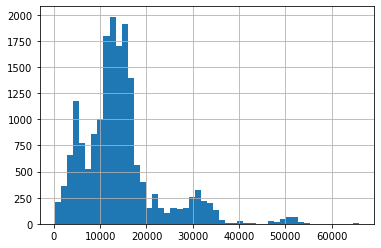

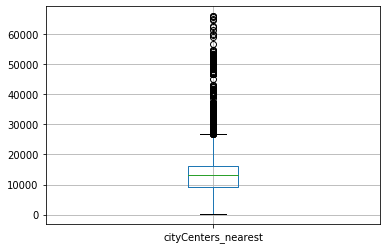

In [78]:
column_details(data, 'cityCenters_nearest', 50)

У гистограммы есть несколько пиков. Скорее всего, это связано с тем, что на одной гистограмме отображаются разные населённые пункты.  
В строках, относящихся к городам, восстановить данные в пропусках не получится. Города большие, а расстояние до их центра может быть разным. А для более мелких населённых пунктов расстояние до ближайшего города восстановить можно, если в других строках, относящихся к ним, эти данные есть.

In [79]:
median_count = 0
group_count = 0
for name, data_grouped in data.query(
    'locality_type != "город" & locality_type != "неизвестно"').groupby('locality_name'):
    median = data_grouped['cityCenters_nearest'].median()
    data.loc[data['locality_name'] == name, 'cityCenters_nearest'] = data['cityCenters_nearest'].fillna(median)
    median_count += 1 - pd.isna(median)
    group_count += 1

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [80]:
print('Пропусков:', data['cityCenters_nearest'].isna().sum())
print('Пропусков: {:.2%}'.format(data['cityCenters_nearest'].isna().sum()/len(data)))
print('Удалось посчитать медиану в {} группах из {}'.format(median_count, group_count))

Пропусков: 4780
Пропусков: 20.52%
Удалось посчитать медиану в 18 группах из 265


Удалось восстановить только два с половиной процента пропусков, так как в большинстве групп не было ни одного не пустого значения. Оставшиеся пропуски оставим.

### Парки в районе 3 км
Изучаем данные в столбце:

column = parks_around3000

Тип данных: float64
Пропущенных значений: 23.10%
Уникальных значений: 5

Описательная статистика

count    17917.000000
mean         0.611207
std          0.801583
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64



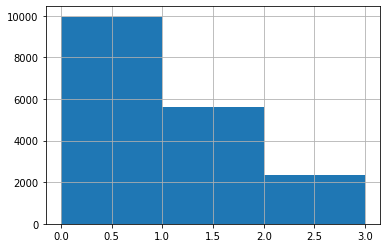

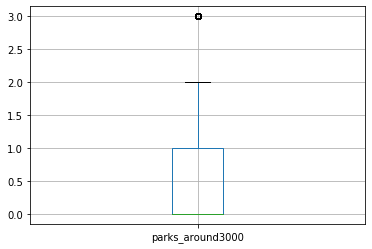

In [81]:
column_details(data, 'parks_around3000', 3)

Данные о количестве и о расстоянии до парков и прудов получены автоматически на основе картографических данных. Возьмём срез по столбцу `parks_around3000`. Посмотрим на строки с пропусками. Если среди них есть такие, в которых указано расстояние до ближайшего парка

In [82]:
data_parks_na = data.loc[data['parks_around3000'].isna(), ['locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest']]
data_parks_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5381 entries, 5 to 23698
Data columns (total 7 columns):
locality_name          5381 non-null object
airports_nearest       605 non-null float64
cityCenters_nearest    602 non-null float64
parks_around3000       0 non-null float64
parks_nearest          0 non-null float64
ponds_around3000       0 non-null float64
ponds_nearest          0 non-null float64
dtypes: float64(6), object(1)
memory usage: 336.3+ KB


Никакой информации о парках или прудах для этих строк нет. Видимо, извлечь их почему-то не удалось, восстановить данные не получится. Оставляем пропуски.

**Тип данных**  
Количество парков не может быть дробным, поэтому пробуем изменить тип данных на `int`. Чтобы оставить пропуски, задаём тип данных `Int64`. Делаем проверку.

In [83]:
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
print('Тип данных:', data['parks_around3000'].dtype)
print('Количество пропусков:', data['parks_around3000'].isna().sum())

Тип данных: Int64
Количество пропусков: 5381


### Расстояние до ближайшего парка
Посмотрим на данные столбца `parks_nearest`:

column = parks_nearest

Тип данных: float64
Пропущенных значений: 65.81%
Уникальных значений: 994

Описательная статистика

count    7966.000000
mean      491.060633
std       342.725154
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64



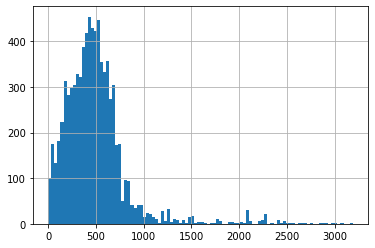

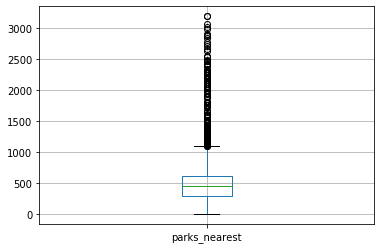

In [84]:
column_details(data, 'parks_nearest', 100)

Пропусков больше половины (65,81%).  
График довольно странной формы. Получается, что у большинства есть парк на расстоянии меньше километра. При  этом мы знаем, что у половины (по крайней мере) вообще нет парков в районе 3 км. Получается, что на расстоянии 2-3 км от парков вообще практически никто не живёт. Возможно, как раз в этот диапазон попадают пропущенные значения, но восстановить их нет возможности. А имеющиеся в столбце данные не вызывают большого доверия.
Странное значение минимального расстояния: 1м.

Посмотрим на минимальные значения столбца `parks_nearest`:

In [85]:
display(data.sort_values(by='parks_nearest').head())

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln,other_utility_area,locality_type
14624,8,45.4,2019-03-20,2,NaN,9,28.43,2,NaN,False,...,43932.0,16436.0,1,1.0,0.0,NaN,42.0,3.77000,10.070,город
11949,7,44.0,2017-11-24,2,2.6,9,30.00,7,NaN,False,...,11806.0,12292.0,1,3.0,1.0,508.0,82.0,4.50000,7.000,город
22941,8,69.3,2019-01-10,1,3.0,4,48.90,4,True,False,...,73391.0,54490.0,3,4.0,1.0,217.0,110.0,10.96500,12.036,город
9344,12,28.1,2017-07-25,1,2.5,9,17.00,1,NaN,False,...,12051.0,11665.0,1,7.0,1.0,780.0,440.0,3.00000,5.500,город
20193,3,102.6,2017-04-21,3,NaN,9,NaN,3,False,False,...,27562.0,6410.0,2,9.0,2.0,480.0,90.0,11.80967,NaN,город


Посмотрим, можно ли определить по нрафику начало странных значений:

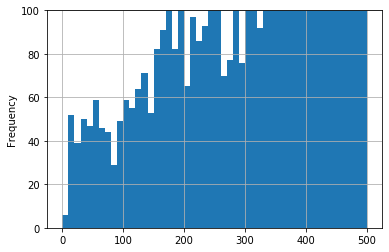

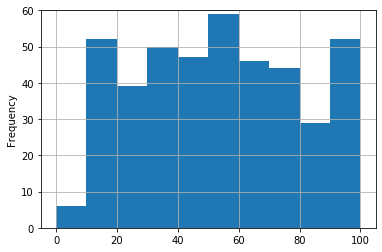

In [86]:
data['parks_nearest'].plot(kind='hist', bins=50, range=(0, 500), ylim=(0, 100), grid=True)
plt.show()
data['parks_nearest'].plot(kind='hist', bins=10, range=(0, 100), ylim=(0, 60), grid=True)
plt.show()

Строк с небольшими значениями много, резкого перепада нет. Но значения меньше 10 совсем редкие и странные. Чтобы не удалять всю строку, заменим странные значения на NA

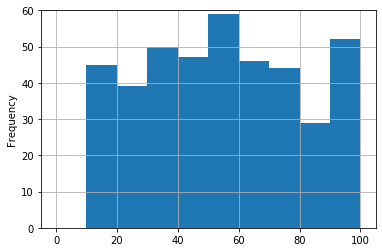

In [87]:
data['parks_nearest'] = data['parks_nearest'].where(data['parks_nearest'] > 10, np.nan)
data['parks_nearest'].plot(kind='hist', bins=10, range=(0, 100), ylim=(0, 60), grid=True)

Неправдоподобные значения удалены, всё в порядке.

### Пруды в районе 3 км
Смотрим на данные в столбце:

column = ponds_around3000

Тип данных: float64
Пропущенных значений: 23.10%
Уникальных значений: 5

Описательная статистика

count    17917.000000
mean         0.769214
std          0.937506
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64



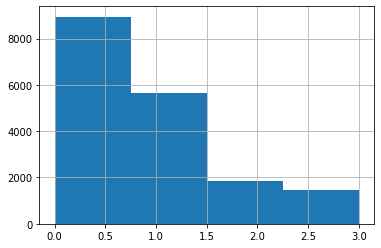

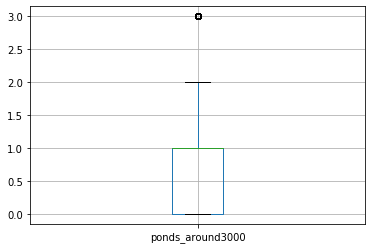

In [88]:
column_details(data, 'ponds_around3000', 4)

Пропущенных значений столько же, сколько в столбце `parks_around3000`, заполнить их не получится.  

**Тип данных**  
Нужно изменить тип данных на `int`. Чтобы оставить информацию о пропусках, задаём тип данных `Int64`. Делаем проверку.

In [89]:
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
print('Тип данных:', data['ponds_around3000'].dtype)
print('Количество пропусков: {} = {:.2%}'.format(data['ponds_around3000'].isna().sum(), 
                                                 data['ponds_around3000'].isna().sum()/len(data)))

Тип данных: Int64
Количество пропусков: 5381 = 23.10%


Тип данных изменён.

### Расстояние до ближайшего пруда
Смотрим на данные столбца:

column = ponds_nearest

Тип данных: float64
Пропущенных значений: 61.49%
Уникальных значений: 1096

Описательная статистика

count    8973.000000
mean      517.968795
std       277.512515
min        13.000000
25%       294.000000
50%       502.000000
75%       728.000000
max      1344.000000
Name: ponds_nearest, dtype: float64



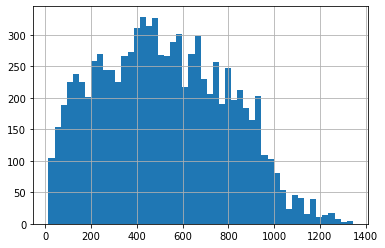

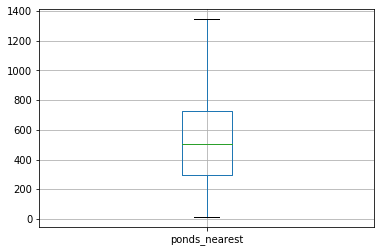

In [90]:
column_details(data, 'ponds_nearest', 50)

Распределение похоже на то, что мы уже видели в столбце `parks_nearest`, хотя нет такого длинного "хвоста" выбросов. Но тоже почему-то все значения располагаются в диапазоне от 0 до 1 километра. Такое было бы возможно, если бы прудов было действительно много, и не было таких домов, от которых до пруда было бы дальше километра. Но мы знаем, что по крайней мере у четверти прудов рядом нет совсем. Значит, должны быть и такие, у которых пруды есть, но далеко (на расстоянии 3-4 км) или неподалёку (2 км).  
К тому же в этом столбце снова очень много пропусков (61.49%). Скорее всего, данные в диапазоне 1-3 км почему-то не удалось выгрузить и рассчитать. Об этой аномалии в данных стоит рассказать менеджеру.

### Сколько дней размещено объявление
Смотрим на данные столбца:

column = days_exposition

Тип данных: float64
Пропущенных значений: 13.40%
Уникальных значений: 1141

Описательная статистика

count    20175.000000
mean       181.432714
std        220.156940
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64



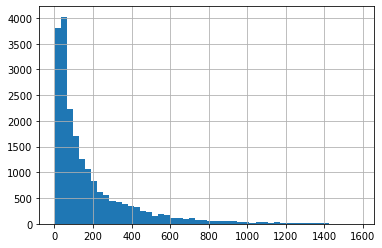

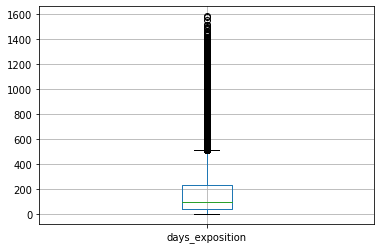

In [91]:
column_details(data, 'days_exposition', 50)

На гистограмме мы видим распределение Пуассона. Есть длинный "хвост" слишком больших значений. Жильё пытались продать на протяжении 3-5 лет. Возможно, про объявление просто забыли? Или была назначена слишком высокая цена?  
Есть слишком маленькие значения, минимальное - 1 день. Реально ли продать квартиру за 1 день?  
Пропусков 13.40%, возможно, это квартиры, которые не были проданы на момент выгрузки данных, можно проверить по датам публикации.

**Анализ редких и выбивающихся значений**  
Посмотрим на минимальные значения. Построим гистограмму с ограниченным размахом (возьмём интервал от 0 до 100 дней) и выведем первые 10 минимальных значений.

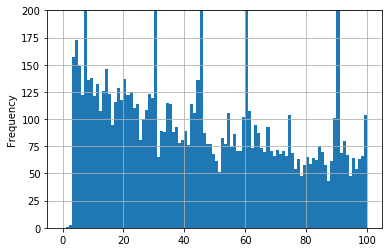

In [92]:
data['days_exposition'].plot(kind='hist', bins=100, range=(0, 100), ylim=(0, 200), grid=True)

In [93]:
data.groupby('days_exposition')['days_exposition'].value_counts().head()

days_exposition  days_exposition
1.0              1.0                  1
2.0              2.0                  3
3.0              3.0                157
4.0              4.0                173
5.0              5.0                149
Name: days_exposition, dtype: int64

Видно резкий скачок на значении три дня. За 1 и 2 дня квартиры проданы всего в 4 случаях, их можно считать выбросами. Заменяем странные значения на NA и делаем проверку.

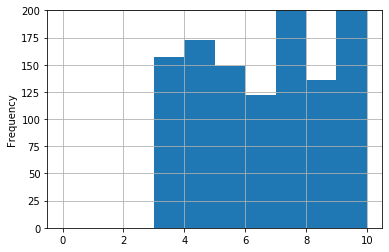

In [94]:
data['days_exposition'] = data['days_exposition'].where(data['days_exposition'] > 2, np.nan)
data['days_exposition'].plot(kind='hist', bins=10, range=(0, 10), ylim=(0, 200), grid=True)

Теперь всё в порядке.

## Рассчёты и добавление результатов в таблицу

***Задание:*** рассчитать цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Цена квадратного метра
Добавляем столбец `price_per_meter`, заполняем его при помощи функции `price_per_meters`, которая делит значение столбца `last_price_mln` на значение столбца `total_area`.

In [95]:
def price_per_meters(row):
    price_per_meter = row['last_price_mln'] / row['total_area']
    return price_per_meter

In [96]:
data['price_per_meter'] = data.apply(price_per_meters, axis=1)
display(data.head())

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln,other_utility_area,locality_type,price_per_meter
0,20,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,...,16028.0,1,482.0,2,755.0,NaN,13.000,32.0,город,0.120370
1,7,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,...,18603.0,0,NaN,0,NaN,81.0,3.350,10.8,поселок,0.082921
2,10,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,...,13933.0,1,90.0,2,574.0,558.0,5.196,13.4,город,0.092786
3,0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,...,6800.0,2,84.0,3,234.0,424.0,64.900,NaN,город,0.408176
4,2,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,...,8098.0,2,112.0,1,48.0,121.0,10.000,27.0,город,0.100000


Цена квардратного метра добавлена.

### День недели, месяц и год публикации объявления

Добавляем столбцы `year`, `month` и `weekday_name` и делаем проверку.

In [97]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['weekday_name']=data['first_day_exposition'].dt.day_name()
display(data.head())

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,last_price_mln,other_utility_area,locality_type,price_per_meter,year,month,weekday_name
0,20,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,...,2,755.0,NaN,13.000,32.0,город,0.120370,2019,3,Thursday
1,7,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,...,0,NaN,81.0,3.350,10.8,поселок,0.082921,2018,12,Tuesday
2,10,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,...,2,574.0,558.0,5.196,13.4,город,0.092786,2015,8,Thursday
3,0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,...,3,234.0,424.0,64.900,NaN,город,0.408176,2015,7,Friday
4,2,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,...,1,48.0,121.0,10.000,27.0,город,0.100000,2018,6,Tuesday


Столбцы добавлены.

### Этаж квартиры
Создаём столбец 'floor_relative' при помощи функции 'relative'. Функция сравнивает значение в столбце 'floor' с единицей и со значением в столбце 'floors_total' и возвращает значения: первый, последний, другой, NA.

In [98]:
def relative(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] < row['floors_total']:
        return 'другой'

In [99]:
data['floor_relative'] = data.apply(relative, axis = 1)
display(data.head())

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,last_price_mln,other_utility_area,locality_type,price_per_meter,year,month,weekday_name,floor_relative
0,20,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,...,755.0,NaN,13.000,32.0,город,0.120370,2019,3,Thursday,другой
1,7,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,...,NaN,81.0,3.350,10.8,поселок,0.082921,2018,12,Tuesday,первый
2,10,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,...,574.0,558.0,5.196,13.4,город,0.092786,2015,8,Thursday,другой
3,0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,...,234.0,424.0,64.900,NaN,город,0.408176,2015,7,Friday,другой
4,2,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,...,48.0,121.0,10.000,27.0,город,0.100000,2018,6,Tuesday,другой


Этаж рассчитан.

### Соотношение жилой и общей площади

In [100]:
def living_area_share(row):
    living_area_share = row['living_area'] / row['total_area']
    return living_area_share


In [101]:
data['living_area_share'] = data.apply(living_area_share, axis=1)
display(data.head())

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,days_exposition,last_price_mln,other_utility_area,locality_type,price_per_meter,year,month,weekday_name,floor_relative,living_area_share
0,20,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,...,NaN,13.000,32.0,город,0.120370,2019,3,Thursday,другой,0.472222
1,7,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,...,81.0,3.350,10.8,поселок,0.082921,2018,12,Tuesday,первый,0.460396
2,10,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,...,558.0,5.196,13.4,город,0.092786,2015,8,Thursday,другой,0.612500
3,0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,...,424.0,64.900,NaN,город,0.408176,2015,7,Friday,другой,NaN
4,2,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,...,121.0,10.000,27.0,город,0.100000,2018,6,Tuesday,другой,0.320000


Всё в порядке.

### Соотношение площади кухни и общей площади

In [102]:
def kitchen_area_share(row):
    kitchen_area_share = row['kitchen_area'] / row['total_area']
    return kitchen_area_share

In [103]:
data['kitchen_area_share'] = data.apply(kitchen_area_share, axis=1)
display(data.head())

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,last_price_mln,other_utility_area,locality_type,price_per_meter,year,month,weekday_name,floor_relative,living_area_share,kitchen_area_share
0,20,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,...,13.000,32.0,город,0.120370,2019,3,Thursday,другой,0.472222,0.231481
1,7,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,...,3.350,10.8,поселок,0.082921,2018,12,Tuesday,первый,0.460396,0.272277
2,10,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,...,5.196,13.4,город,0.092786,2015,8,Thursday,другой,0.612500,0.148214
3,0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,...,64.900,NaN,город,0.408176,2015,7,Friday,другой,NaN,NaN
4,2,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,...,10.000,27.0,город,0.100000,2018,6,Tuesday,другой,0.320000,0.410000


Готово.

**Вывод:**   
В таблицу добавлены столбцы: цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры (первый, последний, другой); соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

В рамках предобработки данных уже изучены все параметры квартир, найдены и проанализированы редкие и выбивающиеся значения и построены гистограммы.

### Время продажи квартиры

***Задание:*** Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
***
Чтобы изучить время продажи квартиры, ещё раз применим функцию `column_details`:


column = days_exposition

Тип данных: float64
Пропущенных значений: 13.42%
Уникальных значений: 1139

Описательная статистика

count    20171.000000
mean       181.468346
std        220.164226
min          3.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64



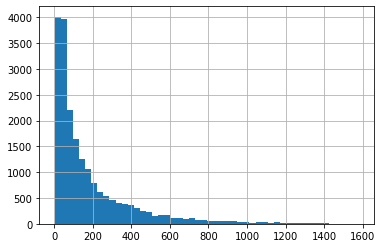

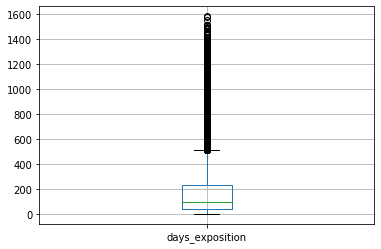

In [104]:
column_details(data, 'days_exposition', 50)

50% квартир были проданы за время от полутора до семи с половиной месяцев (первый квартиль - 45 дней, третий - 232 дня).  

Что касается слишком больших и слишком маленьких значений, основанием для выделения таких значений может быть предметный анализ или визуальный анализ графиков. Построим частотные гистограммы для времени продажи квартиры меньше 3 месяце и больше 1,5 лет.

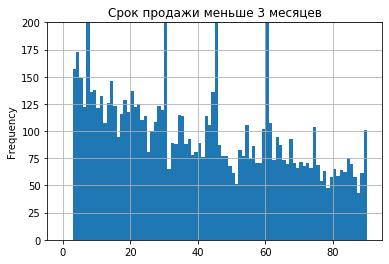

In [105]:
data['days_exposition'].plot(
    kind='hist', bins=90, range=(0, 90), ylim=(0, 200), grid=True, 
    title='Срок продажи меньше 3 месяцев'
)

Максимум гистограммы приходится на минимальные значения времени продажи. По гистограмме сложно выделить какой-то отдельный период слишком быстрых продаж, если только не считать слишком быстрыми продажами удалённые странные значения в 1-2 дня. 

Попробуем найти на гистограмме слишком длительные продажи, для этого построим частотную гистограмму для времени публикации объявления больше года.

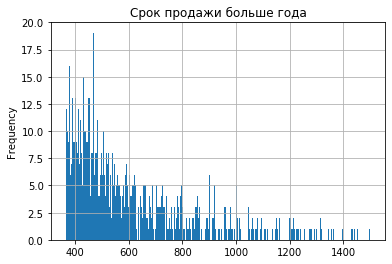

In [106]:
data['days_exposition'].plot(
    kind='hist', bins=(1500-365), range=(365, 1500), ylim=(0, 20), grid=True, 
    title='Срок продажи больше года'
)

Максимум продаж в этом промежутке приходится на срок около полутора лет, затем начинается спад. В раойне 550-600 дней график становится более пологим, а частота объявлений с временем размещения объявления больше 700 дней колеблется на уровне единицы. То есть необычно редкими можно считать продажи, которые шли больше двух лет.

**Вывод:** обычно квартиры продаются за срок от полутора месяцев до полутора лет. Необычно быстрыми продажами можно считать продажи за срок меньше 3 дней, а необычно долгими - за срок более двух лет.

### Зависимость стоимости от площади, числа комнат, удалённости от центра
***Задание:*** Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
***
Чтобы изучить связь стоимости квартиры и её параметров, посчитаем коэффициент корреляции и построит диаграммы рассеяния для столбцов: `last_price_mln`, `total_area`, `rooms`, `cityCenters_nearest`.

,last_price_mln,total_area,rooms,cityCenters_nearest
last_price_mln,1.000000,0.652901,0.362487,-0.212755
total_area,0.652901,1.000000,0.758616,-0.242148
rooms,0.362487,0.758616,1.000000,-0.200599
cityCenters_nearest,-0.212755,-0.242148,-0.200599,1.000000


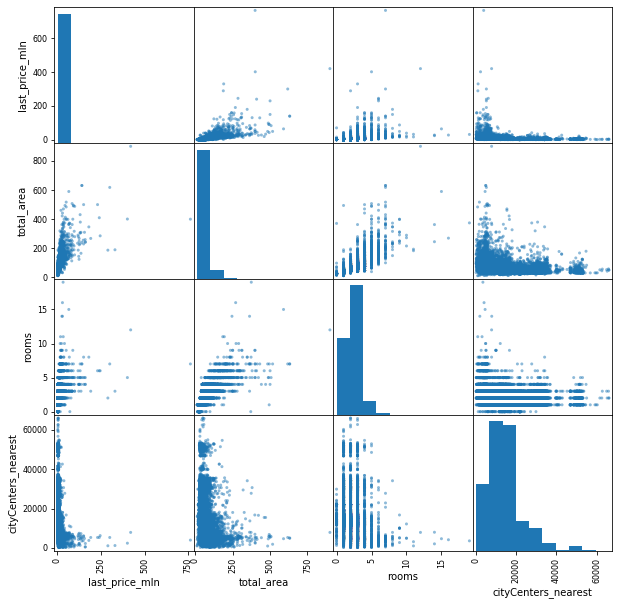

In [107]:
data_analise = data[['last_price_mln', 'total_area', 'rooms', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(data_analise, figsize=(10,10))
data_analise.corr()

По диаграммам рассеяния и по коэффициентам корреляции видно, что цена на квартиры в большей степени зависит от их площади (r=0.65) и в меньшей - от количества комнат (r=0.36). Зависимости цены от расстояния до центра нет (r=-0.21), это связано, вероятно, с тем, что в выборке смешаны квартиры из разных населённых пунктов (квартиры на окраине Санк-Петербурга вполне могут оказаться дороже, чем квартиры в центре маленьких городков).

Попробуем проверить эту гипотезу. Посмотрим, как связана стоимость квартир с удалённостью от центра для разных населённых пунктов. Для этого посчитаем корреляцию между стоимостью квартир и удалённостью от центра, сгруппировав дата фрейм по населённым пунктам. 

In [108]:
data_analise = data[['locality_type', 'locality_name', 'last_price_mln', 'cityCenters_nearest']]

data_corr = pd.DataFrame(
    {
        'locality_type': [], 
        'locality_name': [], 
        'count': [],
        'corr': []
    }
)   

for name, data_grouped in data_analise.groupby('locality_name'):
    count = 0
    corr = data_grouped['last_price_mln'].corr(data_grouped['cityCenters_nearest'])
    data_grouped.reset_index(inplace=True)

    if pd.isna(corr) == False and corr != 1: 
        locality_type = data_grouped.loc[1, 'locality_type']
        count = len(data_grouped)
        row = pd.DataFrame(
            {
                'locality_type': [locality_type], 
                'locality_name': [name], 
                'count': [count],
                'corr': [corr]
            }
        )
        data_corr = data_corr.append(row)
        
data_corr = data_corr.sort_values(by='corr')
data_corr = data_corr.reset_index(drop=True)
data_corr = data_corr.style.format({'count': "{:.0f}", 'corr': "{:.2f}"})  

display(data_corr)        

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,locality_type,locality_name,count,corr
0,поселок,лисий нос,3,-1.00
1,поселок,репино,4,-0.57
2,поселок,саперный,6,-0.53
3,город,зеленогорск,23,-0.43
4,город,санкт-петербург,15492,-0.26
5,неизвестно,неизвестно,49,-0.21
6,город,павловск,38,-0.14
7,поселок,понтонный,20,-0.13
8,поселок,металлострой,66,-0.08
9,город,ломоносов,130,-0.08


В некоторых населённых пунктах цена отрицательно коррелирует с удалённостью от центра (чем дальше от центра, тем ниже цена). Самая высокая корреляция получилась для тех населённых пунктов, где слишком мало наблюдений (посёлок Лисий нос, 3 объявления; посёлок Репино, 4 объявления; посёлок Сапёрный, 6 объявлений; поселок Молодёжное, 5 объявлений), так что этот результат нельзя считать надёжным. В Санкт-Петербурге много наблюдений, и есть небольшая отрицательная корреляция между ценой и удалённостью от центра, которую вряд ли можно считать существенной.
***
**Вывод:** Стоимость квартир сильно зависит от их площади и в меньшей степень от количества комнат. Связь стоимости квартир с удалённостью от центра по имеющимся данным выявить не удалось.

### Зависимость цены от этажа (первый/последний/другой)  
***Задание:*** Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
***
Чтобы оценить зависимость стоимости квартир от дня недели, месяца и года, создадим свобдную таблицу для каждого из столбцов. По строкам будут столбцы `floor_relative`, `year`, `month`, `weekday_name` (для каждой из 4 сводных таблиц отдельно), значения - медиана и среднее значение по столбцу `last_price_mln`.



,mean,median
,last_price_mln,last_price_mln
floor_relative,,
другой,6.686736,4.85
первый,4.831439,3.90
последний,7.423950,4.35


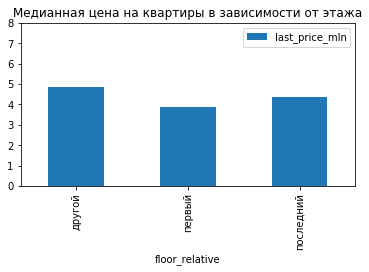

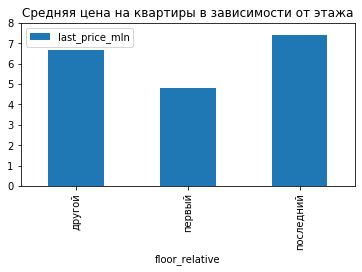

In [109]:
data_pivot = data.pivot_table(
    index='floor_relative',
    values='last_price_mln',
    aggfunc=['mean', 'median']
)
display(data_pivot)

data_pivot.plot(y='median', kind='bar', figsize=(6, 3), ylim=(0, 8),
                title='Медианная цена на квартиры в зависимости от этажа')
data_pivot.plot(y='mean', kind='bar', figsize=(6, 3), ylim=(0, 8),
                title='Средняя цена на квартиры в зависимости от этажа')

Квартиры на первом этаже - самые дешёвые. А вот результаты по последним и другим этажам противоречивы. Медиана указывает на то, что дороже квартиры на промежуточных этажах, а среднее - что самые дорогие квартиры на последних этажах. Скорее всего, квартиры на последних этажах очень неоднородны по цене. Большая часть - недорогие квартиры в обычных домах, которые и составляют промежуточное медианное значение. И есть некоторое количество "выбросов", очень дорогих элитных квартир, мансард, которые сильно сдвигают среднее значение вверх.

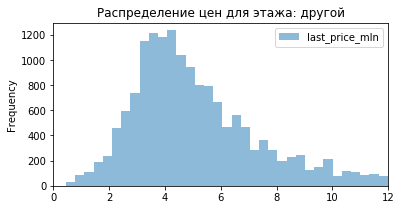

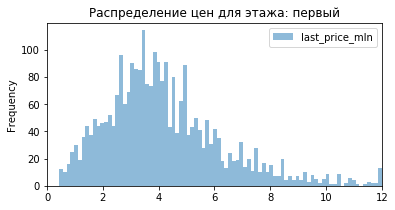

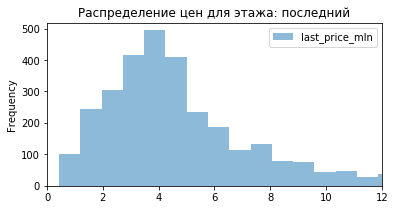

In [110]:
for name, data_grouped in data.groupby('floor_relative'):
    data_grouped['last_price_mln'].plot(kind='hist', xlim=(0, 12), bins=1000, 
            alpha=0.5, legend=True, figsize=(6, 3), title='Распределение цен для этажа: {}'.format(name))
    plt.show()

Максимум распределения ценна квартиры на последних и других этажей располагается примерно на одном значении цен (от 3 до 5 млн), а максимум распределения цен на квартиры на первом этаже - левее, около 3 млн. Доля недорогих квартир гораздо выше для квартир на первом этаже, чем для квартир на последнем и других этажах.  
По гистограммам (по размеру "корзин") видно, что разброс цен на квартиры на первом этаже совсем небольшой. А разброс цен на квартиры на последнем этаже больше, чем на квартиры на других этажах. Это подтверждает нашу гипотезу о том, что обычно квартиры на средних этажах стоят немного дороже, чем на последних, но есть и группа очень дорогих элитных квартир на последних этажах.

**Вывод:** Этаж сильно влияет на цены на квартиры. На первых этажах - самые дешёвые квартиры. Квартиры на промежуточных этажах обычно дороже, чем на последних. Однако есть и очень дорогие элитные квартиры на последних этажах, разброс цен на квартиры на последних этажах очень большой.

### Зависимость цены от даты размещения: дня недели, месяца и года  
***Задание:*** Изучите зависимость от даты размещения: дня недели, месяца и года.  
***
Чтобы изучить зависимость стоимости квартир от даты размещения, посчитаем среднее и медиану для каждого года, месяца и дня недели и построим графики.
***
**Зависимость цен на квартиры от года:**

,mean,median,count
,last_price_mln,last_price_mln,last_price_mln
year,,,
2014,12.179647,7.8685,134
2015,8.499406,5.3370,1178
2016,6.873333,4.5500,2733
2017,6.597687,4.5000,8068
2018,5.981539,4.5925,8356
2019,6.810700,5.1000,2829


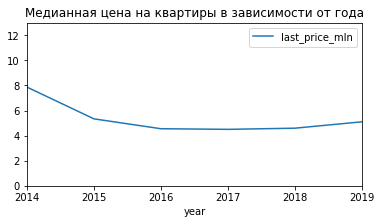

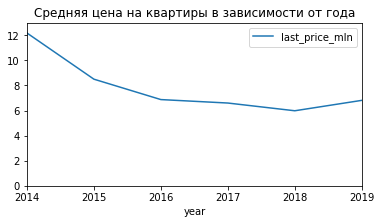

In [111]:
data_pivot = data.pivot_table(
    index='year',
    values='last_price_mln',
    aggfunc=['mean', 'median', 'count']
)
display(data_pivot)


data_pivot.plot(y='median', figsize=(6, 3), ylim=(0, 13),
                title='Медианная цена на квартиры в зависимости от года')
data_pivot.plot(y='mean', figsize=(6, 3), ylim=(0, 13),
                title='Средняя цена на квартиры в зависимости от года')

Динамика цен по годам: в 2019 году наблюдается небольшой рост цен, а самые высокие цены на жильё были в 2014 году. Но за этот год опубликовано всего 134 объявления, результат может быть ненадёжным, если в маленькую выборку попала одна или несколько квартир из группы очень дорогих.   
Проверим, случайно ли повышение средней цены на жильё в 2014 году или все квартиры действительно стоили дороже. Создадим сводную таблицу, в которой будут отражены цены на жильё в зависимости от года и количества комнат (как эквивалента площади).

rooms,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
year,,,,,,,,,,,,,,,,,
2014,NaN,4.60,6.925,9.94,17.350,27.2500,79.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,2.290,3.62,4.990,6.20,10.000,16.2500,19.000,24.9,24.000,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN
2016,2.200,3.50,4.550,5.95,9.800,12.1495,12.500,25.0,18.200,19.5,27.75,NaN,NaN,28.659,NaN,NaN,NaN
2017,2.800,3.50,4.600,6.20,9.100,13.0000,21.250,23.0,29.545,29.0,NaN,33.0,420.0,25.000,NaN,NaN,NaN
2018,2.665,3.60,4.800,6.09,8.450,13.3000,18.075,26.0,35.300,17.0,23.00,17.5,NaN,NaN,NaN,NaN,32.25
2019,2.900,3.93,5.200,6.50,8.825,14.9000,20.000,24.0,NaN,24.0,NaN,NaN,NaN,NaN,65.0,NaN,NaN


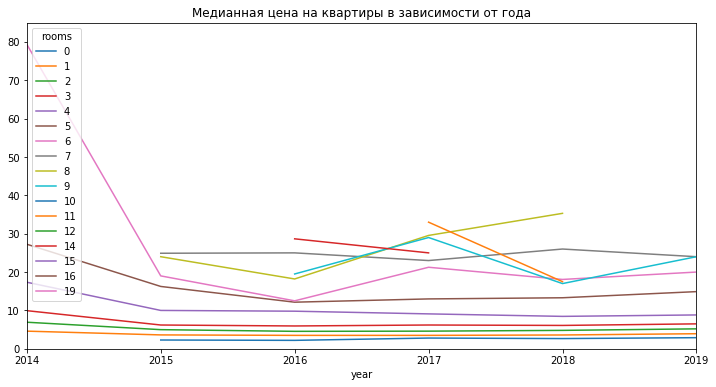

In [112]:
data_pivot = data.pivot_table(
    index='year',
    columns='rooms',
    values='last_price_mln',
    aggfunc='median'
)
display(data_pivot)

data_pivot.plot(figsize=(12, 6), ylim=(0, 85),
                title='Медианная цена на квартиры в зависимости от года')

Действительно, цены на все квартиры в 2014 году были выше, это можно видеть и по медианным значениям цен на квартиры в сводной таблице по количеству комнат и по годам, и на графике.

**Зависимость цен на квартиры от месяца:**

,mean,median
,last_price_mln,last_price_mln
month,,
1,6.652922,4.6000
2,6.513865,4.6675
3,6.403638,4.7000
4,6.776647,4.8000
5,6.637924,4.5600
6,6.331368,4.4000
7,6.647566,4.6500
8,6.341247,4.5800


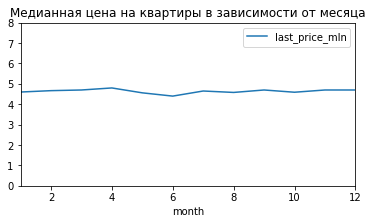

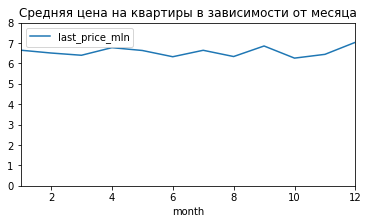

In [113]:
data_pivot = data.pivot_table(
    index='month',
    values='last_price_mln',
    aggfunc=['mean', 'median']
)
display(data_pivot)


data_pivot.plot(y='median', figsize=(6, 3), ylim=(0, 8),
                title='Медианная цена на квартиры в зависимости от месяца')
data_pivot.plot(y='mean', figsize=(6, 3), ylim=(0, 8),
                title='Средняя цена на квартиры в зависимости от месяца')

В зависимости от месяца цена на квартиры меняется незначительно. Есть небольшие колебания средних значений цены, но на таком уровне они вполне могут быть случайными. Медиана же остаётся весь год практически неизменной. 

**Зависимость цен на квартиры от дня недели:**

,mean,median
,last_price_mln,last_price_mln
weekday_name,,
Friday,6.388906,4.60
Monday,6.514153,4.65
Saturday,7.035773,4.60
Sunday,6.268333,4.55
Thursday,6.717804,4.65
Tuesday,6.438343,4.75
Wednesday,6.643425,4.70


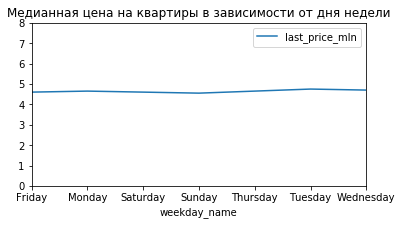

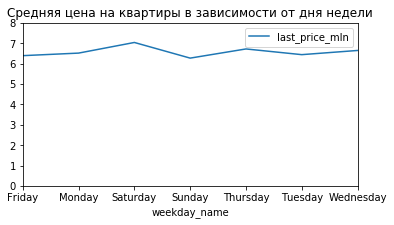

In [114]:
data_pivot = data.pivot_table(
    index='weekday_name',
    values='last_price_mln',
    aggfunc=['mean', 'median']
)
display(data_pivot)


data_pivot.plot(y='median', figsize=(6, 3), ylim=(0, 8),
                title='Медианная цена на квартиры в зависимости от дня недели')
data_pivot.plot(y='mean', figsize=(6, 3), ylim=(0, 8),
                title='Средняя цена на квартиры в зависимости от дня недели')

Медианные значения практически не отличаются, а средние значения немного колеблются, но эти колебания не значительны и не связаны в началом или концом рабочей недели или выходными.  
Попробуем добавить в сводную таблицу год. Возможно, изменение цены на квартиры в 2014 году могло сгладить общую картину, и посмотрев на графики зависимости цены от дня недели по годам можно будет выделить какие-то закономерности.

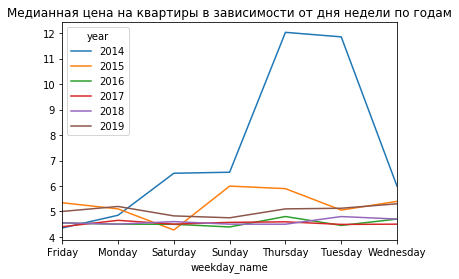

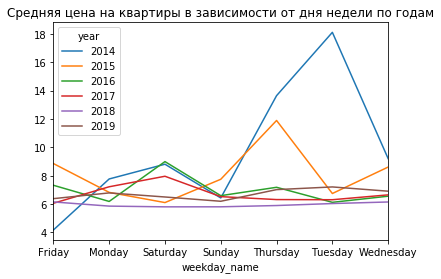

In [115]:
data_pivot = data.pivot_table(
    index='weekday_name',
    columns='year',
    values='last_price_mln',
    aggfunc=['mean', 'median']
)

data_pivot.plot(y='median',
                title='Медианная цена на квартиры в зависимости от дня недели по годам')
data_pivot.plot(y='mean',
                title='Средняя цена на квартиры в зависимости от дня недели по годам')

На графике видно пики стоимости во вторник и четверг  и спад в пятницув 2014 году. 2014 - это первый год, за который есть статистика, в котором было собрано очень мало данных (всего 134 объявления). В другие годы не наблюдается никаких явных закономерностей связи между стоимостью квартир и днём недели. 

**Вывод:** Связи между стоимостью квартир и месяцем или днём недели не выявлено. В 2014 году цены на квартиры были выше, затем снизились и с 2015 по 2017 год были относительно стабильными. В 2018-2019 годах наблюдается тенденция к небольшому повышению цен.

### Населённые пункты с наибольшим количеством объявлений
***Задание:*** Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.   
***
Посчитаем количество объявлений в разных населённых пунктах и распечатаем 10 населённых пунктов с наибольшим количеством объявлений. Сохраним названия 10 населённых пунктов с наибольшим количеством объявлений в список `top_localities`.

In [116]:
localities_sorted = data.groupby('locality_name')['locality_type'].count().sort_values(ascending=False).head(10)
print(localities_sorted)

locality_name
санкт-петербург    15492
мурино               576
кудрово              465
шушары               436
всеволожск           389
пушкин               365
колпино              336
парголово            325
гатчина              295
выборг               230
Name: locality_type, dtype: int64


In [117]:
top_localities = []
for row in localities_sorted.index:
    top_localities.append(row)
    
print(top_localities)
    

['санкт-петербург', 'мурино', 'кудрово', 'шушары', 'всеволожск', 'пушкин', 'колпино', 'парголово', 'гатчина', 'выборг']


В Санкт-Петербурге в тридцать раз больше объявлений, чем в любом другом городе Ленинградской области, так что сравнивать их довольно трудно.  
Скопируем данные по 10 крупнейшим населённым пунктам в таблицу `data_top_10`. Делаем проверку: распечатываем первые 5 строк получившейся таблицы и список уникальных значений в столбце `locality_name`.

In [118]:
data_top_10 = data.query('locality_name in @top_localities')
display(data_top_10.head())
print(data_top_10['locality_name'].unique())

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,last_price_mln,other_utility_area,locality_type,price_per_meter,year,month,weekday_name,floor_relative,living_area_share,kitchen_area_share
0,20,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,...,13.000,32.0,город,0.120370,2019,3,Thursday,другой,0.472222,0.231481
1,7,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,...,3.350,10.8,поселок,0.082921,2018,12,Tuesday,первый,0.460396,0.272277
2,10,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,...,5.196,13.4,город,0.092786,2015,8,Thursday,другой,0.612500,0.148214
3,0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,...,64.900,NaN,город,0.408176,2015,7,Friday,другой,NaN,NaN
4,2,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,...,10.000,27.0,город,0.100000,2018,6,Tuesday,другой,0.320000,0.410000


['санкт-петербург' 'шушары' 'парголово' 'мурино' 'пушкин' 'кудрово'
 'колпино' 'гатчина' 'выборг' 'всеволожск']


При помощи сводной таблицы посчитаем среднюю стоимость квартир и среднюю стоимость квадратного метра в каждом населённом пункте, полученную таблицу отсортируем по средней цене квадратного метра.

In [119]:
data_pivot_top_10 = data_top_10.pivot_table(
    index='locality_name',
    values=['last_price_mln', 'price_per_meter']
)

display(data_pivot_top_10.sort_values(by='price_per_meter'))

,last_price_mln,price_per_meter
locality_name,,
выборг,3.310143,0.058670
всеволожск,3.790723,0.068432
гатчина,3.514845,0.068815
колпино,3.971932,0.075448
шушары,4.116346,0.078511
мурино,3.693301,0.085792
парголово,4.485263,0.090069
кудрово,4.362281,0.095087
пушкин,6.501354,0.103243


Самые дорогие квартиры ожидаемо - в Санкт-Петербурге, чуть меньше - в пригородах, практически вплотную прилегающих к границам Санкт-Петербурга (Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино). При этом самая высокая стоимость жилья - в Санкт-Петербурге и в Пушкине. Средняя цена на квартиры здесь существенно выше, чем в других населённых пунктах, при том, что стоимость квадратного метра отличается не так сильно.  
Несколько дальше находятся три города с наименьшей стоимостью квадратного метра и квартир из десятки (Гатчина, Всеволжск и Выборг).

**Вывод**: Самое большое количество объявлений в Санкт-Петербурге и его пригородах, практически вплотную к нему прилегающих (Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино), а также в трёх самых крупных городах Ленинградской области (Гатчина, Всеволжск и Выборг). Самые дорогие квартиры - В Санкт-Петербурге и Пушкине, а самые дешёвые (из десяти населённых пунктов с самым большим количеством объявлений) - Гатчина, Всеволжск и Выборг.

### Определение границ центральной зоны Санкт-Петербурга
***Задание:*** Выясните, какая область входит в центр Санкт_петербурга. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
***
Скопируем данные по Санкт-Петербургу в таблицу `data_sp`. Сделаем проверку, : распечатаем первые 5 строк получившейся таблицы и список уникальных значений в столбце `locality_name`.

In [120]:
data_spb = data.query('locality_name == "санкт-петербург"')
display(data_spb.head())
print(data_spb['locality_name'].unique())

,total_images,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,last_price_mln,other_utility_area,locality_type,price_per_meter,year,month,weekday_name,floor_relative,living_area_share,kitchen_area_share
0,20,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,...,13.000,32.0,город,0.120370,2019,3,Thursday,другой,0.472222,0.231481
2,10,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,...,5.196,13.4,город,0.092786,2015,8,Thursday,другой,0.612500,0.148214
3,0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,...,64.900,NaN,город,0.408176,2015,7,Friday,другой,NaN,NaN
4,2,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,...,10.000,27.0,город,0.100000,2018,6,Tuesday,другой,0.320000,0.410000
7,5,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,False,...,7.915,NaN,город,0.110545,2019,4,Thursday,другой,NaN,0.263966


['санкт-петербург']


Создаём столбец `cityCenters_nearest_km`, округлив до километров расстояние до центра, делаем проверку.

In [121]:
data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest'] /1000).round()
print(data_spb['cityCenters_nearest_km'].head())

0    16.0
2    14.0
3     7.0
4     8.0
7    12.0
Name: cityCenters_nearest_km, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Jupyter выдает предупреждение SettingWithCopyWarning о том, что операция может быть совершена над копией датафрейма, но мы сделали проверку и видим, что всё в порядке. 

Посчитаем среднюю цену для каждого километра удалённости от центра.

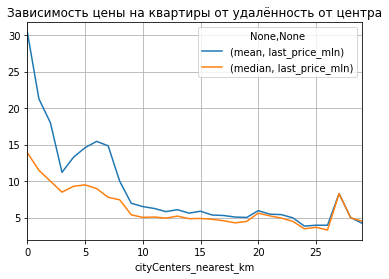

In [122]:
price_from_km = data_spb.pivot_table(
    index='cityCenters_nearest_km',
    values=['last_price_mln'],
    aggfunc=['mean', 'median']
)

price_from_km.plot(grid=True, title='Зависимость цены на квартиры от удалённость от центра')

На графике есть локальный минимум стоимости квартир на расстоянии 3 км от центра и локальный максимум стоимости квартир на расстоянии 6-7 км от центра. Границей центральной области можно считать локальный минимум после резкого понижения средней и медианной цены.  
Локальный максимум на расстоянии 6-7 км от центра, скорее всего, связан с тем, что на этом расстоянии находится какой-то отдельный элитный район, но уже не в центре.

**Вывод:** Жильём в цетре Санкт-Петербурга можно считать то, которое расположено на расстоянии до 3 километров от центра.

### Изучение параметров квартир в центре
***Задание:*** Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
***
Выделим в отдельную таблицу к вартиры в центре (расстояние до центра Санкт-Петербурга меньше 3 км).

In [123]:
data_spb_centre = data_spb.query('cityCenters_nearest <= 3000')
print(data_spb_centre['cityCenters_nearest'].max())

2999.0


Проанализируем нужные параметры в сравнении с квартирами по всему Санкт-Петербургу и по всей Ленинградской области. Для этого напишем функцию `compare`, которая будет считать среднее и медиану по столбцу для трёх датафреймов и сторить по ним частотные гистограммы. На входе функция будет принимать названия трёх таблиц, название сравниваемого столбца и количество корзин для графика.

In [124]:
def compare(data1, data2, data3, col, bins):
    
    """Функция для сравнения распределений, средних и медиан в трёх таблицах с одинаковыми столбцами.
    Печатает заголовок с названием столбца, по которому проводится сравнение, 
    выводит таблицу с медианой и средним значением по столбцу для каждой из таблиц,
    строит частотную гистограмму.
    Принимает аргументы:
        - название трёх сравниваемых таблиц;
        - название столбца;
        - количество корзин для гистограммы"""
    
    """Печатаем название столбца"""
    head = 'Сравнение значений квартир в Ленинградской области, Санкт-Петербурге \nи центре Санкт-Петербурга по параметру '
    print('\033[1m' +  head + col + '\033[0m')
    
    """Создаём и выводим датафрейм со средним значением и медианой по столбцу col для каждой из таблиц"""
    columns = [col, 'mean', 'median']
    data_for_comparison = [
        ['Ленинградская область', data1[col].mean(), data1[col].median()],
        ['Санкт-Петербург', data2[col].mean(), data2[col].median()],
        ['Центр Санкт-Петербурга', data3[col].mean(), data3[col].median()]
    ]      
    df = pd.DataFrame(columns = columns, data = data_for_comparison)
    df.set_index(col, inplace=True)
    display(df)
    
    """Название столбца во всех таблицах одинаковое. Чтобы различать данные по разным датафреймам в легенде,
    добавляем к названию столбцов сокращённое название таблицы"""
    name1 = col + '_len_obl'
    name2 = col + '_spb'
    name3 = col + '_spb_centre'
    
    data1 = data1.rename(columns={col : name1})
    data2 = data2.rename(columns={col : name2})
    data3 = data3.rename(columns={col : name3})
    
    """Строим частотные гистограммы. 
    По шкале y выбрана логорифмическая шкала, чтобы можно было сравнивать таблицы с разным количеством наблюдений"""
    data1[name1].plot(kind='hist', logy=True,  bins=bins, alpha=0.5, 
                       title='Сравнение значений {} квартир в Ленинградской области, \nСанкт-Петербурге и центре Санкт-Петербурга'
                       .format(col), legend=True)
    data2[name2].plot(kind='hist', logy=True,  bins=bins, alpha=0.5, legend=True)
    data3[name3].plot(kind='hist', logy=True, bins=bins, alpha=0.5, legend=True)
    


Проверяем работу функции на столбце `total_area`:

Сравнение значений квартир в Ленинградской области, Санкт-Петербурге 
и центре Санкт-Петербурга по параметру total_area


,mean,median
total_area,,
Ленинградская область,60.560188,52.0
Санкт-Петербург,64.924537,55.0
Центр Санкт-Петербурга,102.773533,88.4


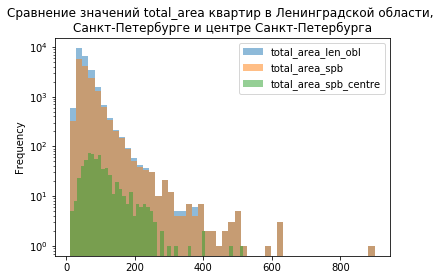

In [125]:
compare(data, data_spb, data_spb_centre, 'total_area', 50)

По средним значениям и медианам видно, что в центре Санкт-Петербурга квартиры намного больше по площади, чем во всём Санкт-Петербурге. А в Санкт-Петербурге соответственно больше, чем в Ленинградской области.  
На гистограмме форма распределения площади квартир в Ленинградской области и Санкт-Петербурге очень близка, а пик распределения площади квартир в центре С-П несколько сдвинут вправо и более пологий, то есть в центре действительно намного больше квартир с большой площадью. 

Сравним цены на квартиры:

Сравнение значений квартир в Ленинградской области, Санкт-Петербурге 
и центре Санкт-Петербурга по параметру last_price_mln


,mean,median
last_price_mln,,
Ленинградская область,6.563162,4.65
Санкт-Петербург,8.074188,5.50
Центр Санкт-Петербурга,18.194035,10.20


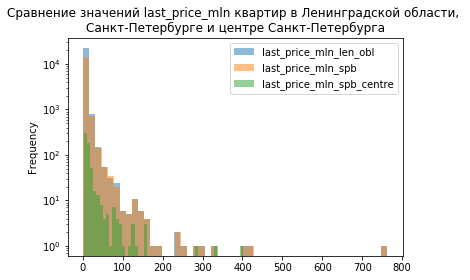

In [126]:
compare(data, data_spb, data_spb_centre, 'last_price_mln', 50)

Сравнение значений квартир в Ленинградской области, Санкт-Петербурге 
и центре Санкт-Петербурга по параметру rooms


,mean,median
rooms,,
Ленинградская область,2.075886,2.0
Санкт-Петербург,2.176801,2.0
Центр Санкт-Петербурга,3.199352,3.0


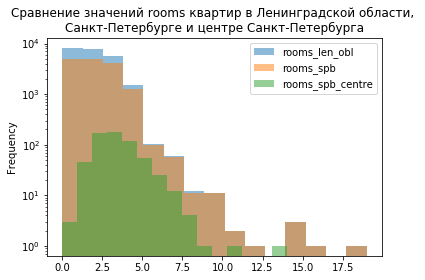

In [127]:
compare(data, data_spb, data_spb_centre, 'rooms', 15)

По гистограмме видно, что в центре большая часть квартир имеет больше 3 комнат, а во всём Санкт-Петербурге, так же, как и в области большая часть - это студии, одно- и двухкомнатные квартиры.

Сравним высоту потолков:

Сравнение значений квартир в Ленинградской области, Санкт-Петербурге 
и центре Санкт-Петербурга по параметру ceiling_height


,mean,median
ceiling_height,,
Ленинградская область,2.726746,2.65
Санкт-Петербург,2.763626,2.70
Центр Санкт-Петербурга,3.237352,3.20


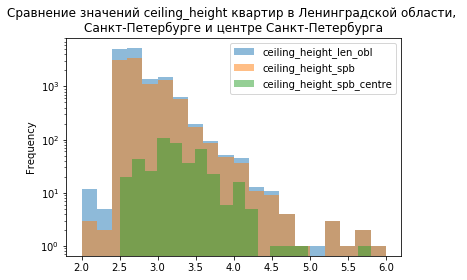

In [128]:
compare(data, data_spb, data_spb_centre, 'ceiling_height', 20)

С высотой полотков мы видим ту же картину: форма распределения высоту потолков в Санкт-Петербурге и области почти не отличается: чаще всего встречаются потолки минимальной высоты 2,4 метра, чем больше высота потолков, тем реже они встречаются. А в центре пик сдвинут вправо и более пологий, приходится на высоту потолкв от 3 до 3,7 метров.

**Вывод:** по всем изученным параметрам квартиры в центре отличаются от квартир в Санкт-Петербурге и Ленинградской области. У них гораздо чаще бывает большая площадь, большее число комнат, выше потолки и выше цена. 

### Зависимость стоимости от параметров квартир в центре
***Задание:*** Выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
***

**Зависимость цен на квартиры от числа комнат, удалённости от центра**  
Посчитаем корреляцию и построим дианграммы рассеяния для параметров

,last_price_mln,total_area,rooms,cityCenters_nearest
last_price_mln,1.000000,0.560066,0.226173,-0.116453
total_area,0.560066,1.000000,0.743038,-0.070720
rooms,0.226173,0.743038,1.000000,-0.033279
cityCenters_nearest,-0.116453,-0.070720,-0.033279,1.000000


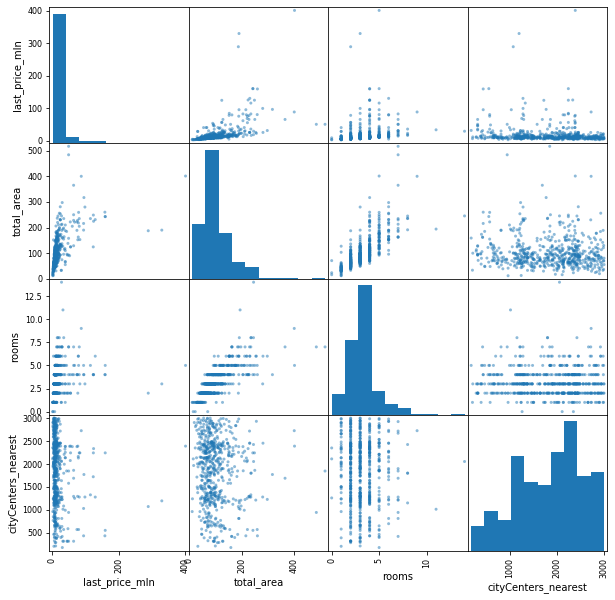

In [129]:
data_analise_spb_centre = data_spb_centre[['last_price_mln', 'total_area', 'rooms', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(data_analise_spb_centre, figsize=(10,10))
data_analise_spb_centre.corr()

Самое большое влияние на цену оказывает общая площадь квартир в центре (r=0.56). Площадь квартир сильно связана с количеством комнат (r=0.74), при этом цена от количества комнат зависит слабо (r=0.23). Зависимость от расстояния от центра не выявлена (r=-0.12).  
На диаграммах рассеяния можно видеть, что зависимость цены от количества комнат всё же есть, но, видимо, она смазывается выбросами.

**Зависимость цен на квартиры от этажа**
Чтобы изучить зависимость цен на квартиры от этажа, создадим сводную таблицу с параметрами этаж (первый/последний/другой) и построим по ней диаграммы для среднего значения и медианы.

,mean,median
,last_price_mln,last_price_mln
floor_relative,,
другой,19.065506,11.500
первый,11.127302,7.499
последний,20.168787,9.600


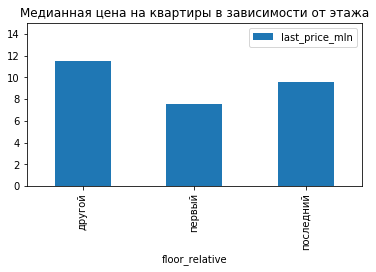

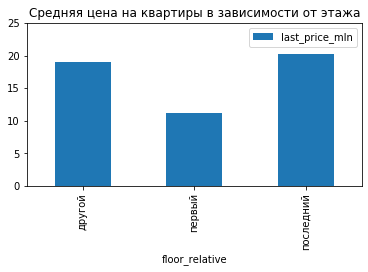

In [130]:
data_pivot = data_spb_centre.pivot_table(
    index='floor_relative',
    values='last_price_mln',
    aggfunc=['mean', 'median']
)
display(data_pivot)

data_pivot.plot(y='median', kind='bar', figsize=(6, 3), ylim=(0, 15),
                title='Медианная цена на квартиры в зависимости от этажа')
data_pivot.plot(y='mean', kind='bar', figsize=(6, 3), ylim=(0, 25),
                title='Средняя цена на квартиры в зависимости от этажа')

Соотношение цен между квартирами на разных этажах в центре такое же, как и везде. Квартиры на первых этажах намного дешевле, чем на последних и других. Дороже всего квартиры на промежуточных этажах, а у квартир на последних этажах самый большой расброс цен.   
Посмотрим на распределение цен на квартиры на первом, последнем и других этажах.

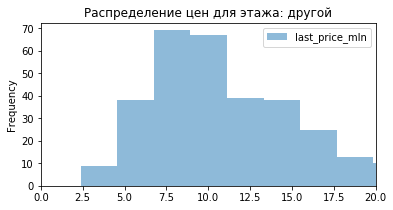

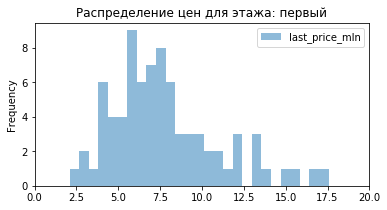

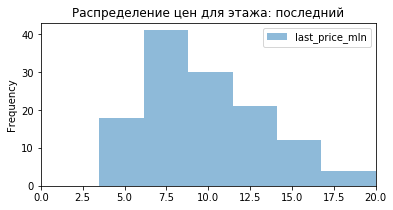

In [131]:
for name, data_grouped in data_spb_centre.groupby('floor_relative'):
    data_grouped['last_price_mln'].plot(kind='hist', bins=150, 
            alpha=0.5, legend=True, xlim=(0, 20), figsize=(6, 3), title='Распределение цен для этажа: {}'.format(name))
    plt.show()


Распределение цен на квартиры в зависимости от этажа в центре очеень похоже на то, что мы видели для всех квартир. Разброс цен на квартиры на первом этаже меньше, а максимум немного сдвинут влево. Цены на квартиры на последнем этаже в среднем чуть ниже, чем цены на квартиры на промежуточных этажах, но разброс цен на квартиры на последних этажах очень большой, то есть самые дорогие квартиры - именно на последних этажах.

**Зависимость цен на квартиры от года публикации объявления**  
Построим график зависимости цены от даты публикации объявления и посчитаем среднее и медиану цены по годам:

,mean,median,count
,last_price_mln,last_price_mln,last_price_mln
year,,,
2014,56.410407,55.712036,4
2015,19.918348,10.770000,69
2016,17.778138,10.300000,87
2017,17.420511,9.600000,225
2018,15.779770,9.555000,165
2019,23.219951,12.590000,67


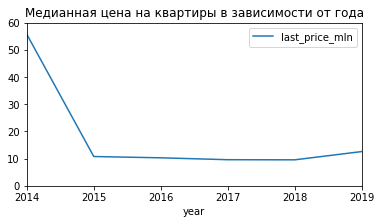

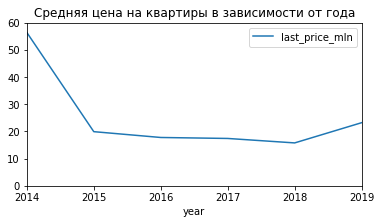

In [132]:
data_spb_centre_pivot = data_spb_centre.pivot_table(
    index='year',
    values='last_price_mln',
    aggfunc=['mean', 'median', 'count']
)
display(data_spb_centre_pivot)


data_spb_centre_pivot.plot(y='median', figsize=(6, 3), ylim=(0, 60),
                title='Медианная цена на квартиры в зависимости от года')
data_spb_centre_pivot.plot(y='mean', figsize=(6, 3), ylim=(0, 60),
                title='Средняя цена на квартиры в зависимости от года')

Цены на квартиры в центре менялись примерно так же, как и в целом по области. В 2014 году квартиры стоили дороже, с 2015 по 2018 год был период стабильности с небольшим снижением, а в 2019 наметилось небольшое повышение цен.

**Вывод:** Цены на квартиры зависят примерно от тех же параметров, что и везде (сильно зависят от площади, в меньшей степени от количества комнат). Самые дешёвые квартиры - на первом этаже, в среднем квартиры на промежуточных этажах дороже квартир на последнем этаже, но самые дорогие квартиры часто бывают на последнем этаже. Динамика цен по годам в центре тоже мало отличается от динамики цен по области. Самые высокие цены были в 2014 году, с 2015 по 2018 было очень плавное снижение цен, и в 2019 году небольшой рост. Удалённость от центра, в отличие от остальной Ленингридской области, в центре Санкт-Петербурга на цену квартир не влияет.

## Общий вывод

**Краткий обзор проведённой работы**  

Данные подготовлены к работе. Проанализированы данные по столбцам, построены гистограммы, исправлены ошибки (странные и необычные значения), заполнены пропуски, исключены из анализа выбросы. Изменён тип данных столбцов в тех случаях, где он не соответствовал цели. Столбец с текстовыми данными (название населённого пункта) проверен на отсутствие ошибок и разделён на два столбца: тип населённого пункта и название населённого пункта. Данные проверены на наличие дублирующихся строк.

Рассчитаны и добавлены в таблицу параметры: цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры (первый, последний, другой), соотношение жилой и общей площади, отношение площади кухни к общей. 
 
Проведён исследовательский анализ данных. Проанализировано время продажи квартиры, определены 10 населённых пунктов с наибольшим количеством объявлений, определены границы центральной зоны Санкт-Петербурга. Проанализирована зависимость цен на квартиры от следующих параметров квартиры: общая площадь, число комнат, этаж, удалённость от центра, время размещения объявления.  
Изучены отличия квартир в центре Санкт-Петербурга от квартир во всём городе и области.  

Построены сводные таблицы и описана вероятность возвращения кредита вовремя в исследуемых категориях клиентов.   

********

**Выводы**  
1. **Время продажи квартиры:** обычно квартиры продаются за срок от полутора месяцев до полутора лет. Необычно быстрыми продажами можно считать продажи за срок меньше 3 дней, а необычно долгими - за срок более двух лет. 

**Зависимость стоимости от параметров квартир:**  
  
2. **Площадь и количество комнат** Стоимость квартир сильно зависит от их площади и в меньшей степень от количества комнат.  
3. **Удалённость от центра** Связь стоимости квартир с удалённостью от центра по имеющимся данным выявить не удалось.  
4. **Этаж** Этаж сильно влияет на цены на квартиры. На первых этажах - самые дешёвые квартиры. Квартиры на промежуточных этажах обычно дороже, чем на последних. Однако есть и очень дорогие элитные квартиры на последних этажах, разброс цен на квартиры на последних этажах очень большой.  
5. **День и месяц публикации объявления** Связи между стоимостью квартир и месяцем или днём недели не выявлено. 
6. **Год публикации объявления** В 2014 году цены на квартиры были выше, затем снизились и с 2015 по 2017 год были относительно стабильными. В 2018-2019 годах наблюдается тенденция к небольшому повышению цен.
5. Самое большое количество объявлений в Санкт-Петербурге и его пригородах, практически вплотную к нему прилегающих (Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино), а также в трёх самых крупных городах Ленинградской области (Гатчина, Всеволжск и Выборг). Самые дорогие квартиры - В Санкт-Петербурге и Пушкине, а самые дешёвые (из десяти населённых пунктов с самым большим количеством объявлений) - Гатчина, Всеволжск и Выборг.
6. Жильём в цетре Санкт-Петербурга можно считать то, которое расположено на расстоянии до 3 километров от центра.
7. по всем изученным параметрам квартиры в центре отличаются от квартир в Санкт-Петербурге и Ленинградской области. У них гораздо чаще бывает большая площадь, большее число комнат, выше потолки и выше цена.
8. Цены на квартиры зависят примерно от тех же параметров, что и везде (сильно зависят от площади, в меньшей степени от количества комнат). Самые дешёвые квартиры - на первом этаже, в среднем квартиры на промежуточных этажах дороже квартир на последнем этаже, но самые дорогие квартиры часто бывают на последнем этаже. Динамика цен по годам в центре тоже мало отличается от динамики цен по области. Самые высокие цены были в 2014 году, с 2015 по 2018 было очень плавное снижение цен, и в 2019 году небольшой рост. Удалённость от центра, в отличие от остальной Ленингридской области, в центре Санкт-Петербурга на цену квартир не влияет.